## Characterisation of whole genome sequence data from South African Neisseria gonorrhoeae isolates
This notebook will be a documentation of data explored and figures generated for my 4th year master's project. I am analysing whole-genome sequence data of Neisseria Gonorrhoea from South Africa. These are my main objectives:

1) Characterisation of genomes
2) Identification of anti-microbial resistance determinants
3) Comparison of genomes

While I will analyse my South African dataset alone, I will also analyse it in conjunction with (i) other available South African isolate data, (ii) data for isolates across the continent of Africa and (iii) data for isolates across the globe. These additional data will be acquired through the online database PubMLST.

### Introduction

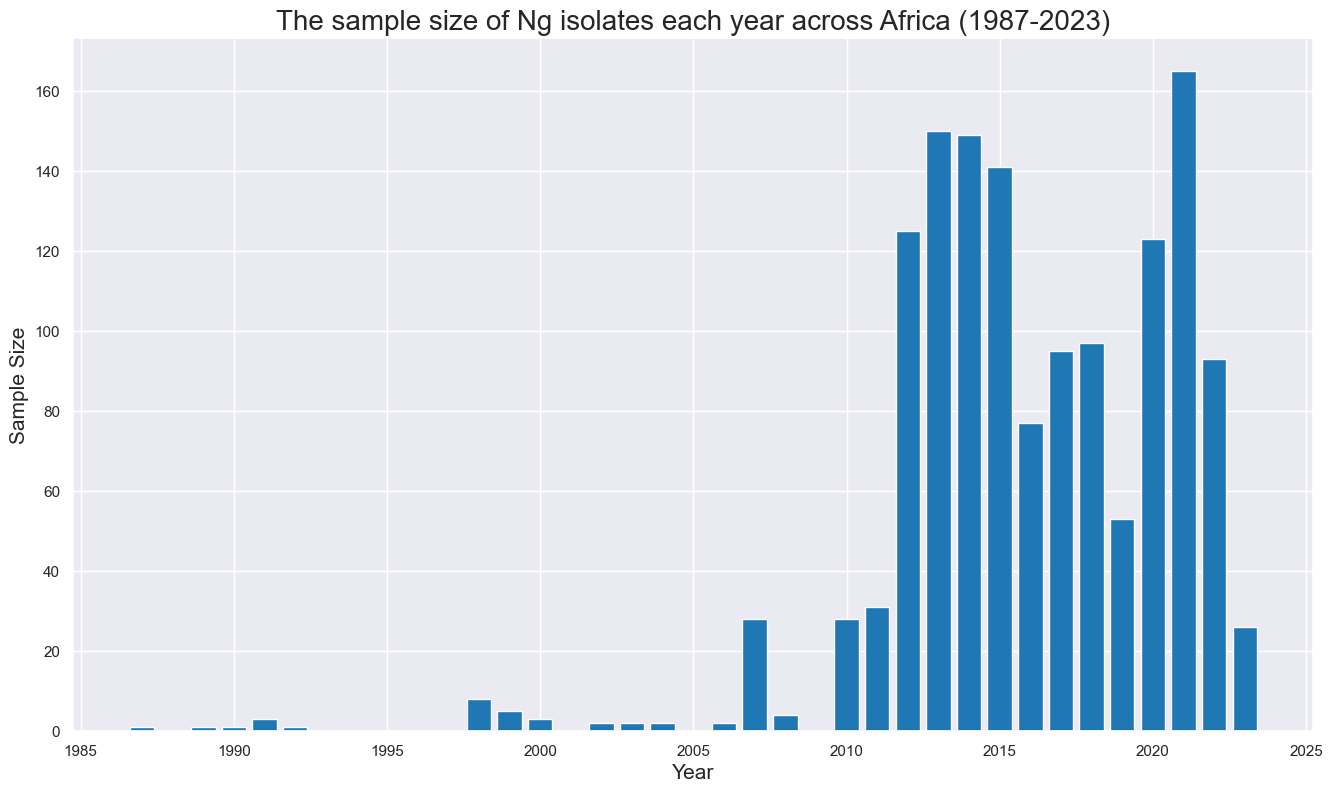

In [203]:
import importlib
import Functions
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

importlib.reload(Functions)


    # importing data from across Africa
afr: pd.DataFrame = pd.read_csv("Data/afr_priv.csv", sep = ",", header = "infer")

    # keeping only ID, country and year
afr.drop(columns = ["private_record", "private_owner"], inplace = True)

    # counting no. samples each year
year_count = afr.groupby("year").year.count()

    # converting series to DataFrame
year_df = pd.DataFrame({"year": year_count.index, "sample_size": year_count.values})


    # bar graph
sns.set_theme(style = "darkgrid")

Functions.bar(x = year_df.year, y = year_df.sample_size, xlab = "Year", ylab = "Sample Size", title = "The sample size of Ng isolates each year across Africa (1987-2023)")

plt.xlabel("Year", fontsize = 15)
plt.ylabel("Sample Size", fontsize = 15)

plt.show()


This figure shows the number of Neisseria Gonorrhoeae isolates (available on PubMLST) collected across Africa through time. 2012 is the first year that data that forms my South African data was collected. This highlights a major problem regarding surveillance of Neisseria Gonorrhoeae in Africa and the need for projects that collects and analyses large quantities of isolates.

In [97]:
    # counting no. isolates in each combination of country & year
country_year = afr.groupby(["country", "year"]).count().reset_index()
    
    # renaming column header 
country_year.rename(columns = {"id": "sample_size"}, inplace = True)

    
    # creating a pivot table
pivot_df = country_year.pivot_table(index = "year", columns = "country", values = "sample_size")
   

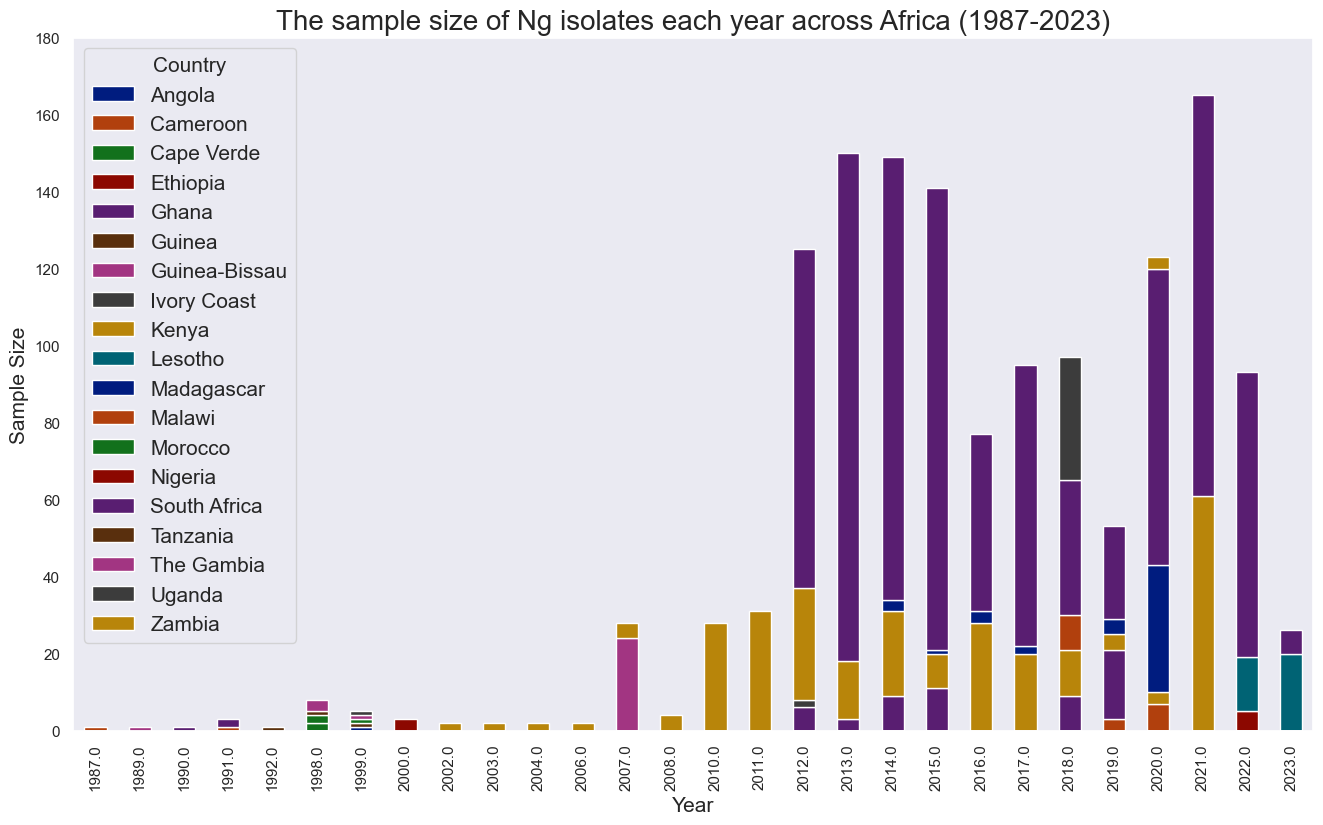

In [98]:
 # creating a stacked bar graph
sns.set_theme(style = "dark", palette = "dark")

pivot_df.plot(kind = "bar", stacked = True, figsize = (16,9), xlabel = "Year", ylabel = "Sample Size", ylim = (0,180))

plt.xlabel("Year", fontsize = 15)
plt.ylabel("Sample Size", fontsize = 15)
plt.title("The sample size of Ng isolates each year across Africa (1987-2023)", fontsize = 20)
#plt.axhline(y = 100)
plt.legend(title = "Country", fontsize = 15, title_fontsize = "15")

plt.show()


Not only is there a lack of good surveillance in Africa but there is large disproportion in terms of the countries that are represented. South Africa makes up a large proportion of the sample, with other countries (mainly Kenya) filling up the rest. However, most of the South African isolates are from my South African data.

In [99]:
    # importing all South African isolates
afr_priv = pd.read_csv("Data/afr_priv.csv", sep = ",", header = "infer")

    # removing all privately owneed isolates by filtering
afr_priv = afr_priv[afr_priv.private_record == False]

    # removing columns
afr_priv.drop(columns = ["private_record", "private_owner"], inplace = True)

    # grouping by country & year
country_year2 = afr_priv.groupby(["country", "year"]).count().reset_index()

    # renaming column "id"
country_year2.rename(columns = {"id": "sample_size"}, inplace = True)

    # creating pivot table
pivot_df2 = country_year2.pivot_table(index = "year", columns = "country", values = "sample_size")


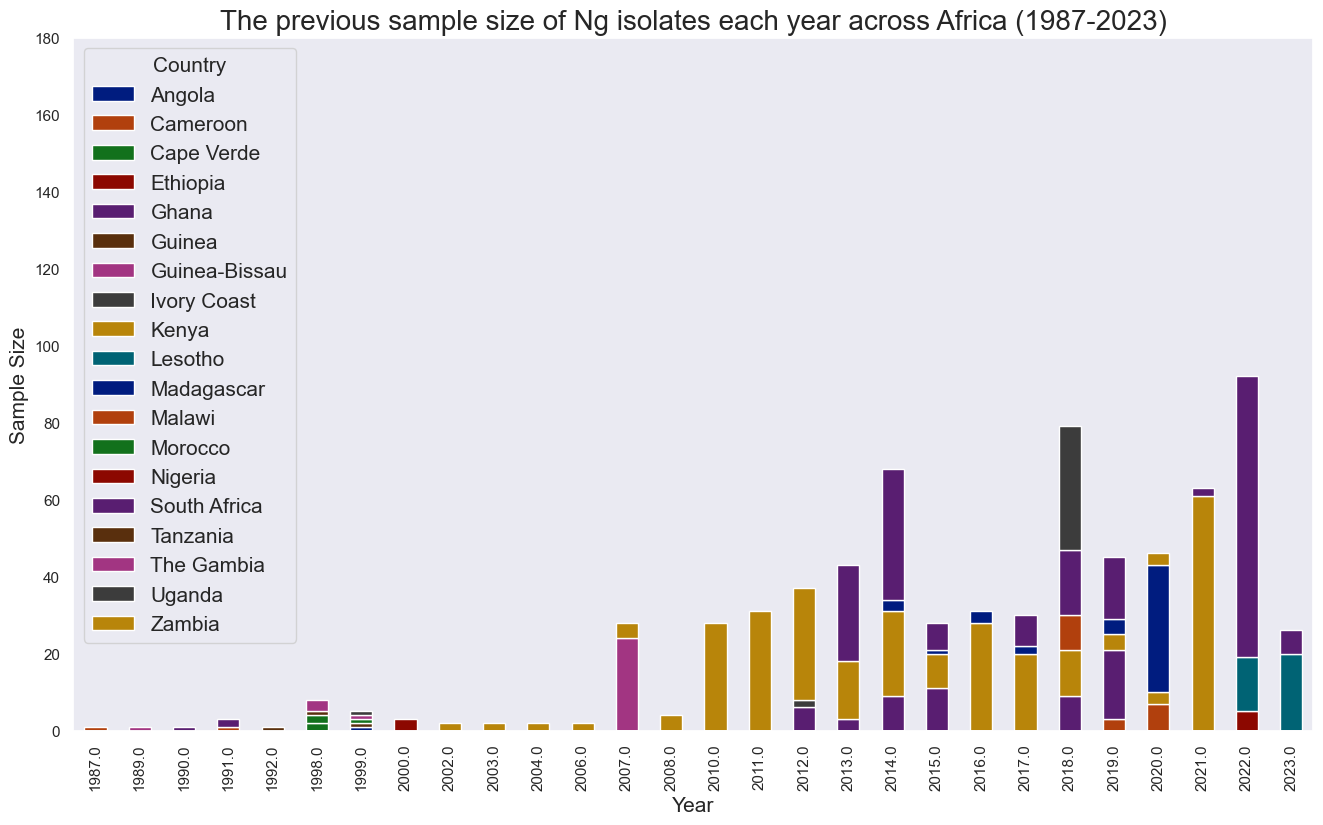

In [100]:
    # creating stacked bar graph
sns.set_theme(style = "dark", palette = "dark")

pivot_df2.plot(kind = "bar", stacked = True, figsize = (16,9), ylim = (0, 180))

plt.xlabel("Year", fontsize = 15)
plt.ylabel("Sample Size", fontsize = 15)
plt.title("The previous sample size of Ng isolates each year across Africa (1987-2023)", fontsize = 20)
#plt.axhline(y = 100)
plt.legend(title = "Country", fontsize = 15, title_fontsize = 15)

plt.show()

This figure shows the isolate collection across Africa, excluding the isolates collected for this project's analysis. It's visible between the two graphs how much of an increase to the overall isolate collection the new South African samples gives.

In [101]:
#fig, ax = plt.subplots(2,1, figsize = (16,9), sharex = True)

#pivot_df.plot(kind = "bar", stacked = True, figsize = (16,9), ylim = (0, 170), ax = ax[0])

#pivot_df2.plot(kind = "bar", stacked = True, figsize = (16,9), ylim = (0, 170), ax = ax[1])

#ax[0].legend(title = "Country", ncol = 2, fontsize = 12, title_fontsize = 12)
#ax[1].legend().set_visible(False)

#plt.show()


In [102]:
    # replacing all NAs with 0
pivot_df.fillna(value = 0, inplace = True)    

    # calculating the cumulative sum along the years
cum_afr = pivot_df.cumsum(axis = 0)

print(cum_afr.loc[2023.0].sum())

1416.0


Note to self: Only 1416 isolates instead of 1886 because 470 isolates don't have country data.

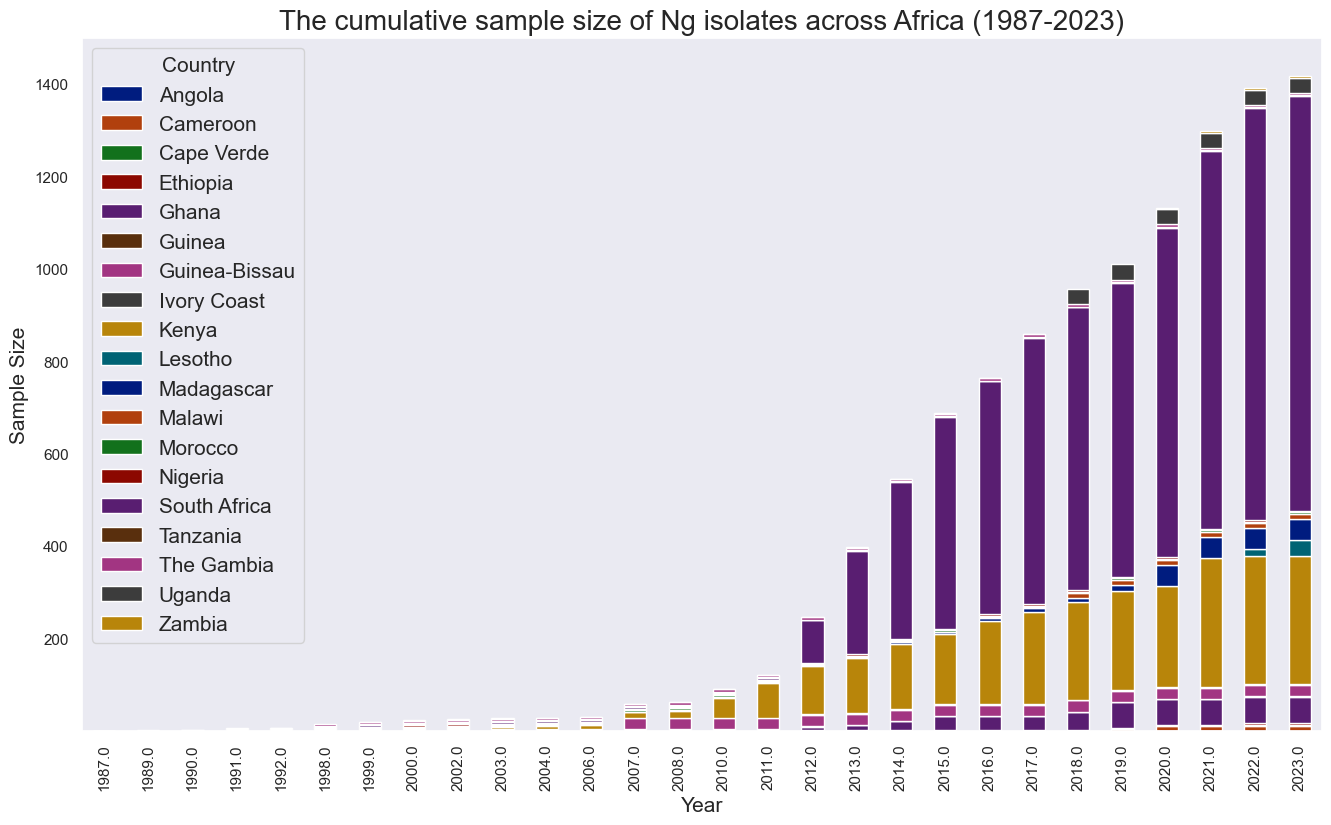

In [103]:
    # creating a stacked bar graph
sns.set_theme(style = "dark", palette = "dark")

cum_afr.plot(kind = "bar", stacked = True, figsize = (16,9), ylim = (1,1500))

plt.xlabel("Year", fontsize = 15)
plt.ylabel("Sample Size", fontsize = 15)
plt.title("The cumulative sample size of Ng isolates across Africa (1987-2023)", fontsize = 20)
plt.legend(title = "Country", fontsize = 15, title_fontsize = "15")

plt.show()


710.0


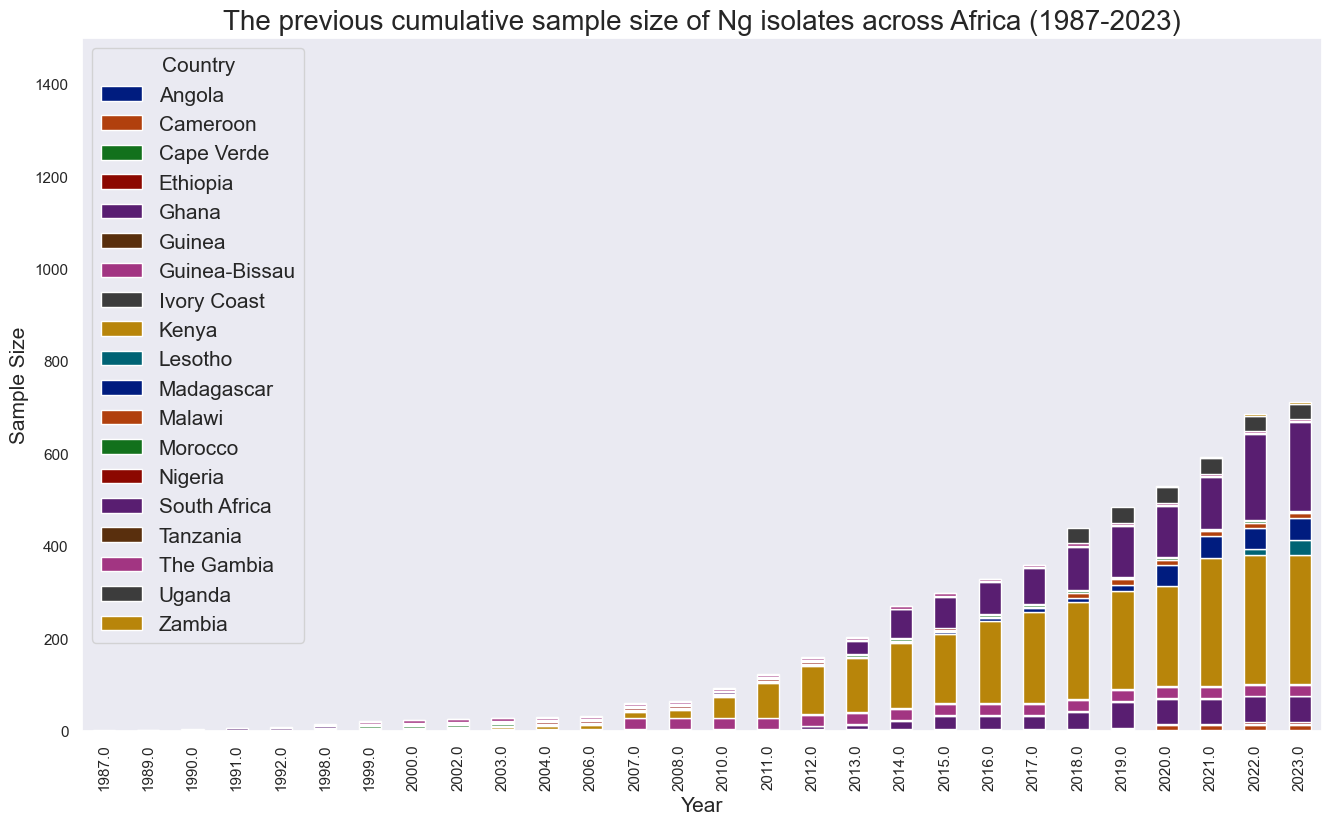

In [104]:
    # replacing all NAs with 0
pivot_df2.fillna(value = 0, inplace = True)    

    # calculating the cumulative sum along the years
cum_afr2 = pivot_df2.cumsum(axis = 0)

print(cum_afr2.loc[2023.0].sum())

    # creating a stacked bar graph
sns.set_theme(style = "dark", palette = "dark")

cum_afr2.plot(kind = "bar", stacked = True, figsize = (16,9), ylim = (0,1500))

plt.xlabel("Year", fontsize = 15)
plt.ylabel("Sample Size", fontsize = 15)
plt.title("The previous cumulative sample size of Ng isolates across Africa (1987-2023)", fontsize = 20)
plt.legend(title = "Country", fontsize = 15, title_fontsize = "15")

plt.show()


The two figures above reiterate the significant relative increase in isolate collection that this project works with. 

### Phenotypic AMR data

#### My South African collection

##### SIR data


In [105]:
    # importing phenotypic AMR data for my South African isolates
my_amr_sir: pd.DataFrame = pd.read_csv("Data/my_amr_sir.csv", sep = ",", header = "infer")


    # renaming columns...
my_amr_sir.rename(columns = {'cefixime_SIR': "cef_sir", 'ceftriaxone_SIR': "ceftri_sir", "ciprofloxacin_SIR": "cipro_sir", "penicillin_SIR": "pen_sir", "tetracycline_SIR": "tet_sir"}, inplace = True)


    # separating out the data for each antimicrobial, while removing rows with missing data
    
    # cefixime
my_cef: pd.Series = my_amr_sir["cef_sir"].dropna(axis = 0, how = "any")
    # ceftriaxone
my_ceftri: pd.Series = my_amr_sir["ceftri_sir"].dropna(axis = 0, how = "any")
    # ciprofloxacin
my_cipro: pd.Series = my_amr_sir["cipro_sir"].dropna(axis = 0, how = "any")
    # penicillin
my_pen: pd.Series = my_amr_sir["pen_sir"].dropna(axis = 0, how = "any")
    # tetracycline
my_tet: pd.Series = my_amr_sir["tet_sir"].dropna(axis = 0, how = "any")


    # counting the frequency of S/I/R for each antimicrobial
    
    # cefixime
amr_cef: pd.Series = my_cef.groupby(my_cef).count()
    # ceftriaxone
amr_ceftri: pd.Series = my_ceftri.groupby(my_ceftri).count()
    # ciprofloxacin
amr_cipro: pd.Series = my_cipro.groupby(my_cipro).count()
    # penicillin
amr_pen: pd.Series = my_pen.groupby(my_pen).count()
    # tetracycline
amr_tet: pd.Series = my_tet.groupby(my_tet).count()


Here I have imported a dataset containing phenotypic AMR data for my South African isolates. I conducted some operations on this dataset:

1) Created individual series for each antimicrobial.
2) Created a series for each antimicrobial that summarises the number of records of S, I and R in their respective DataFrame.

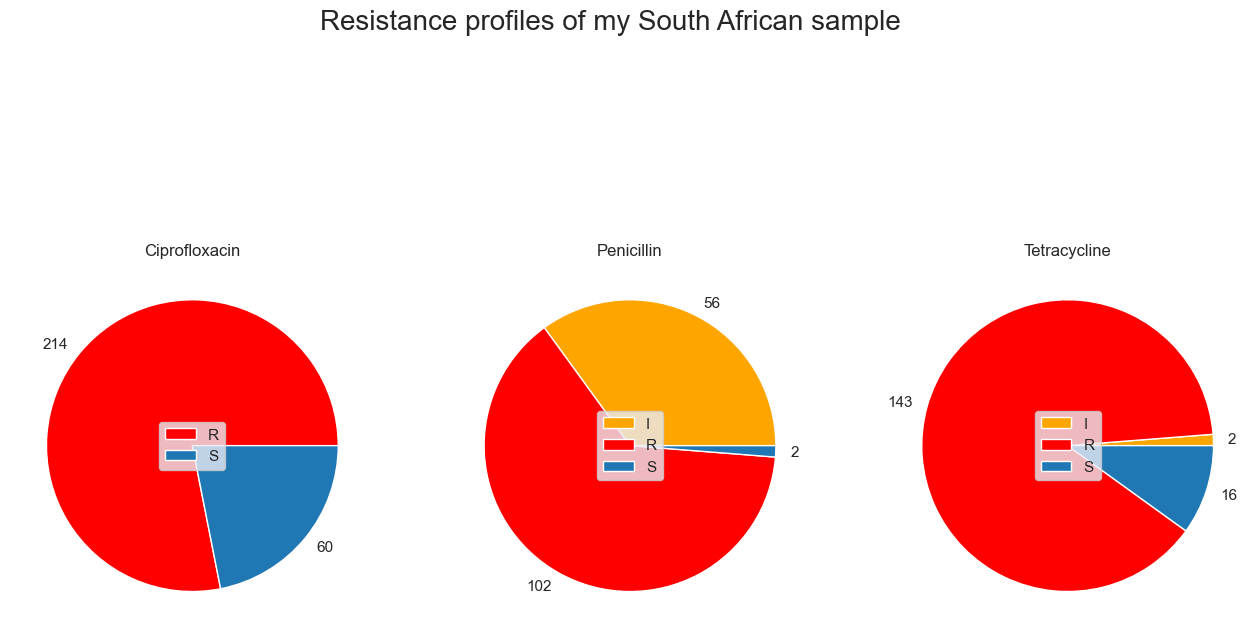

In [106]:
    # Creating a figure with 4 subplots
fig, ax = plt.subplots(1,3, figsize = (16,9))

    # making a pie chart showing the results of phenotypic AMR tests to ciprofloxacin
Functions.pie(data = amr_cipro, title = "Ciprofloxacin", ax = ax[0], colors = ["red", "#1f77b4"])

    # ...same for penicillin
Functions.pie(data = amr_pen, title = "Penicillin", ax = ax[1], colors = ["orange","red", "#1f77b4"])

    # ...same for tetracyclin
Functions.pie(data = amr_tet, title = "Tetracycline", ax = ax[2], colors = ["orange","red", "#1f77b4"])

    # adding a title to the figure
fig.suptitle("Resistance profiles of my South African sample", fontsize = 20)

plt.show()

This figure contains pie charts that show the frequency of S, I and R in my South African collection for ciprofloxacin, penicillin and tetracycline. These antimicrobials are previously-recommended treatments for gonorrhoea, but have since been made redundant due to high level AMR.

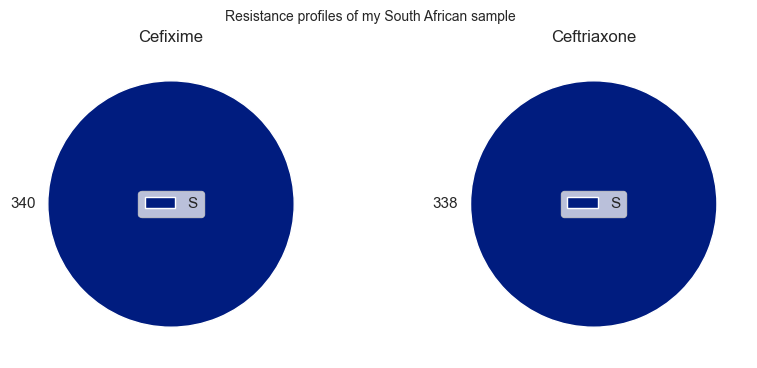

In [107]:
    # Creating a figure with 4 subplots
fig, ax = plt.subplots(1,2, figsize = (10,4))

    # making a pie chart showing the results of phenotypic AMR tests to cefixime
Functions.pie(data = amr_cef, title = "Cefixime", ax = ax[0])

    # ...same for ceftriaxone
Functions.pie(data = amr_ceftri, title = "Ceftriaxone", ax = ax[1])

    # adding a title to the figure
fig.suptitle("Resistance profiles of my South African sample", fontsize = 10)

plt.show()

Here I have created two figures. Each pie chart corresponds to a different antimicrobial (ceftriaxone & cefixime) and shows the frequency of isolates in my South African isolates dataset at each level of antimicrobial resistance (S, I, R)

##### MIC data

In the previous figures, there is no pie chart for Azithromycin. This is because Azithromycin doesn't have a EUCAST breakpoint. Furthermore, Azithromycin MIC signs that are available on PubMLST are based on whatever threshold is used for determining them. Therefore, I will look at the MIC values to explore resistance.

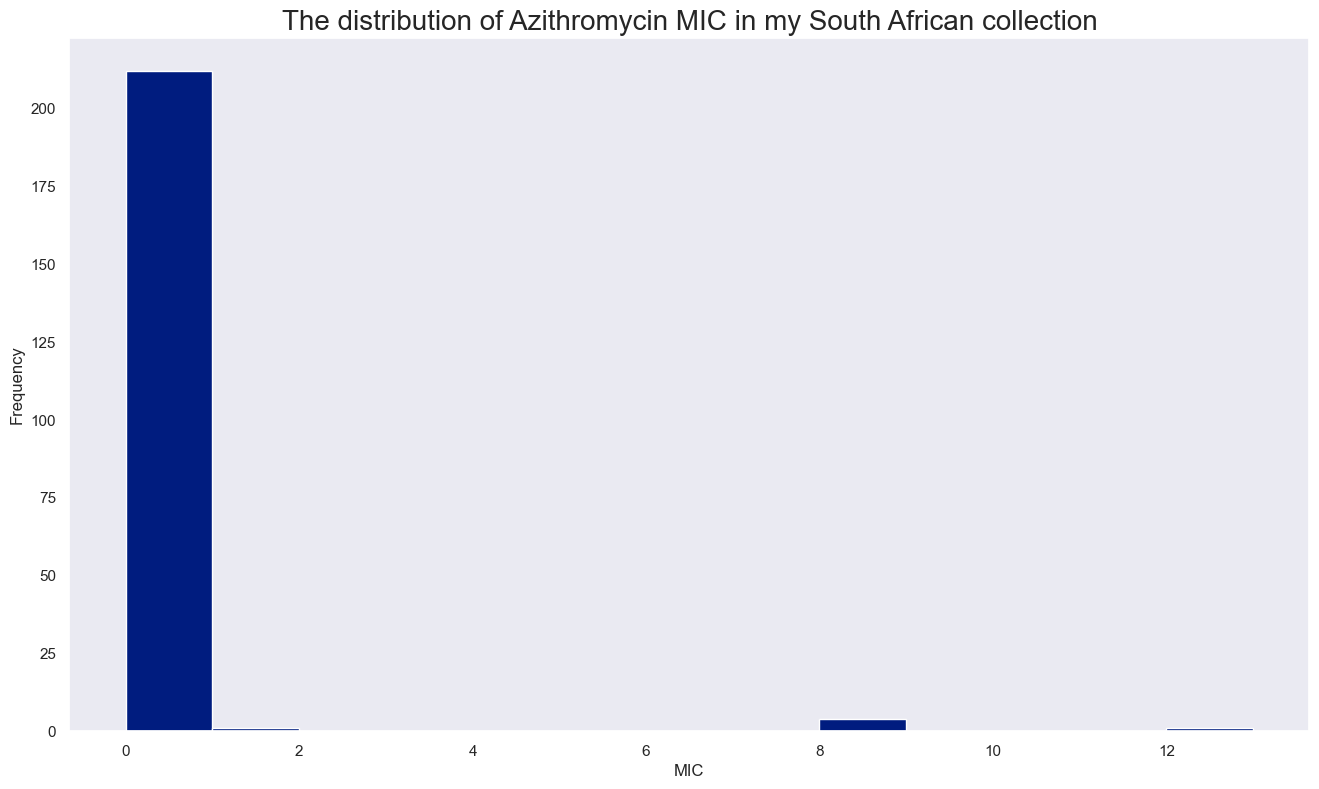

In [108]:
    # importing MIC data
my_amr_mic: pd.DataFrame = pd.read_csv("Data/my_amr_mic.csv", sep = ",", header = "infer")

    # cleaning function
Functions.clean(df = my_amr_mic, rename_cols = {"azithromycin_mic": "azi_mic", "cefixime_mic": "cef_mic", "ceftriaxone_mic": "ceftri_mic"}, replace_val = {"Gauteng": "Gauteng Province", "KwaZulu Natal": "Kwazulu-Natal", "KwaZulu-Natal": "Kwazulu-Natal"})

    
    # filtering for azithromycin data
my_azi: pd.DataFrame = pd.DataFrame(my_amr_mic["azi_mic"])
    # removing rows with missing data
my_azi_clean: pd.DataFrame = my_azi.dropna(axis = 0, how = "any")


    # plotting the distribution of azithromycin MIC
fig = plt.figure(figsize = (16,9))

plt.hist(data = my_azi_clean, x = "azi_mic", bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13])

plt.title("The distribution of Azithromycin MIC in my South African collection", fontsize = 20)
plt.xlabel("MIC")
plt.ylabel("Frequency")

plt.show()


Here, I imported Azithromycin MIC (not sign) data for my South African isolates and plotted their MICs in a histogram. To determine "resistant" strains, I will use the EUCAST epidemiological cut-off value (ECOFF) 1 mg/L (> 1). The majority of isolates with MIC data have an MIC <= 1, but some have an MIC beyond that which may indicate resistance.

In [109]:
    # parsing out the strains with an MIC > ECOFF
my_azi_res: pd.DataFrame = my_azi_clean.loc[my_azi_clean["azi_mic"] > 1]

print(f"There are {len(my_azi_res)} isolates that are resistant to Azithromycin")
#my_azi_res


There are 5 isolates that are resistant to Azithromycin


I have created a new DataFrame containing the isolates with an MIC > 1 mg/L. I will investigate this in "Genotypic & Phenotypic AMR links".

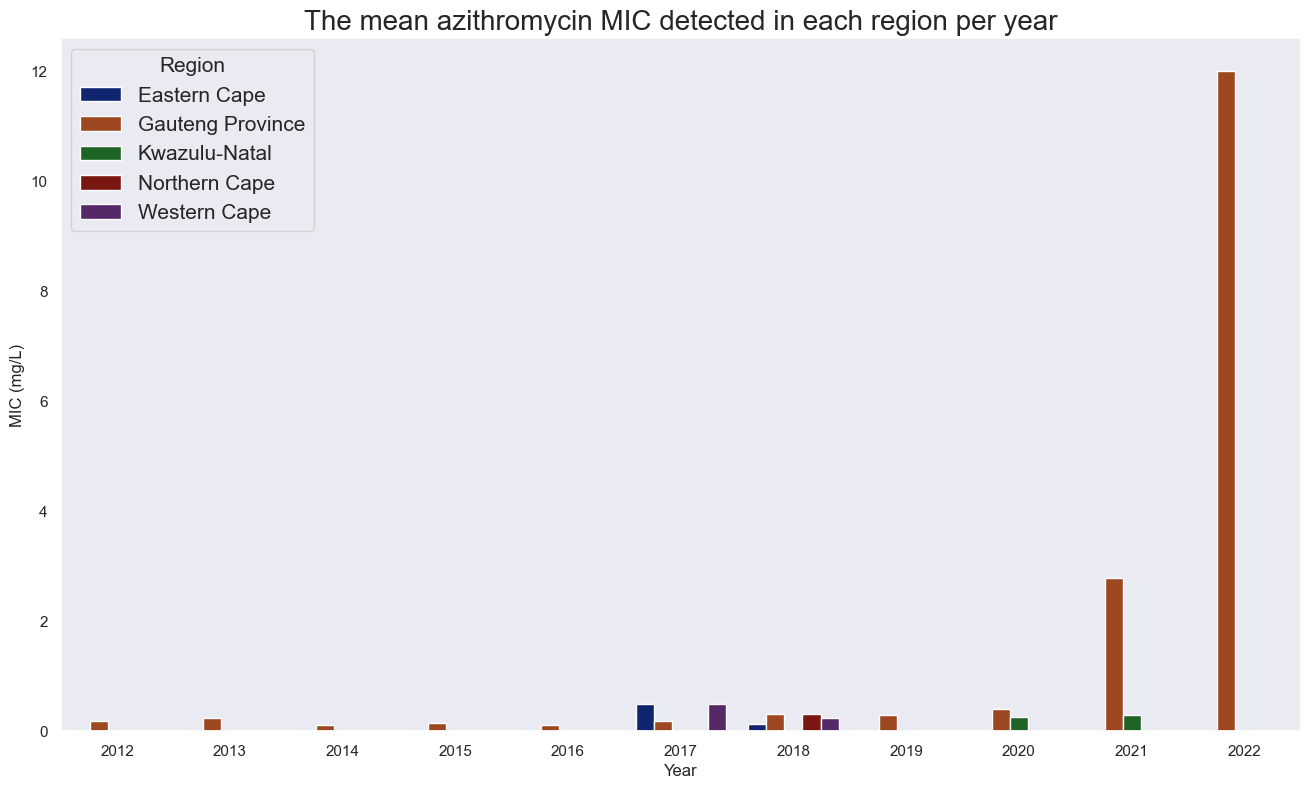

In [110]:
    # filtering for azithromycin MIC data 
my_azi_mic: pd.DataFrame = my_amr_mic.drop(columns = ["cef_mic", "ceftri_mic"])

    # removing rows without MIC data
my_azi_mic_clean: pd.DataFrame = my_azi_mic.dropna(subset = "azi_mic")

    # creating a pivot table
my_azi_pivot: pd.DataFrame = my_azi_mic_clean.pivot_table(index = "year", columns = "region", values = "azi_mic", aggfunc = "mean")


    # melting the pivot table
my_azi_melt: pd.DataFrame = my_azi_pivot.reset_index().melt(id_vars = "year", var_name = "region", value_name = "azi_mic")


    # plotting bar graph with Seaborn
fig = plt.figure(figsize = (16,9))

sns.barplot(data = my_azi_melt, x = "year", y = "azi_mic", hue = "region", palette = "dark")

#plt.tight_layout()
plt.xlabel("Year")
plt.ylabel("MIC (mg/L)")
plt.title("The mean azithromycin MIC detected in each region per year", fontsize = 20)
plt.legend(title = "Region", title_fontsize = 15, fontsize = 15)

plt.show()



I created a DataFrame that contains data on Azithromycin MIC for each year & region sampled in my South African collection. The above bar graph shows this data, with the mean MIC each year for each region. 2021 and 2022 show a significant increase in Azithromycin MIC: 2021 had 4 isolates with an MIC of 8 and 2022 had one isolate with an MIC of 12. This is a concerning discovery and will be investigated later on.

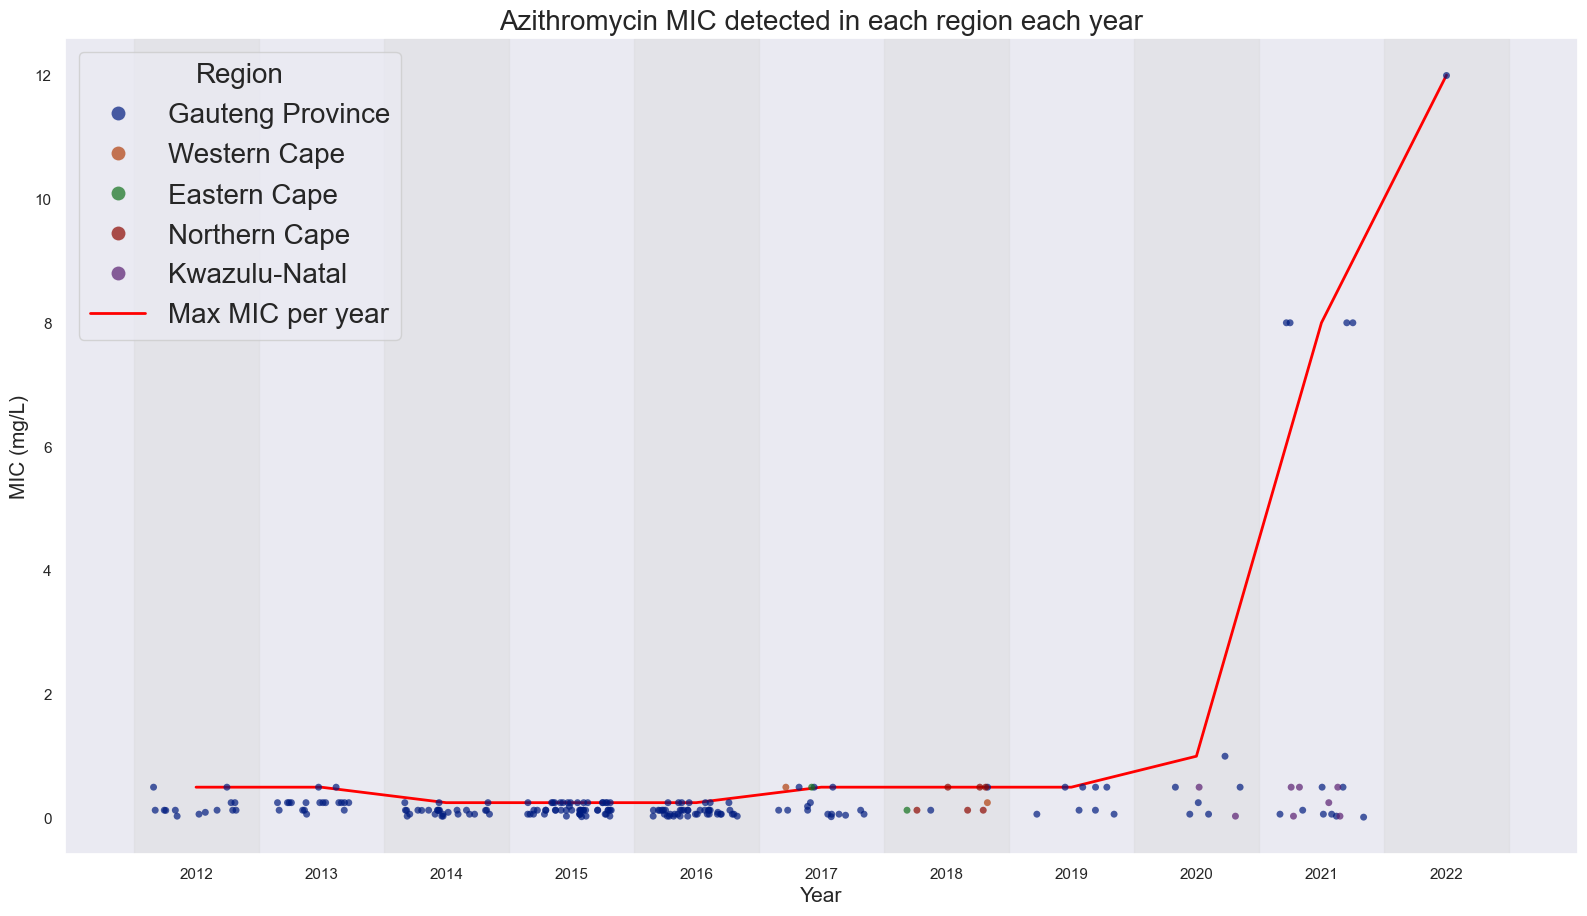

In [334]:
    # replacing NaNs in "region" columns
my_azi_mic_clean.loc[:, "region"] = my_azi_mic_clean["region"].fillna("NA")

    # extracting the maximum azithromycin MIC each year 
max_azi_mic: pd.Series = my_azi_mic_clean.groupby("year")["azi_mic"].max().reset_index()

    # converting "year" to a categorical variable and aligning them to the "year" in my_azi_mic_clean
max_azi_mic["year"] = pd.Categorical(values = max_azi_mic["year"], categories = my_azi_mic_clean["year"].unique(), ordered = True)


    # setting a random seed
np.random.seed(12)    

    # plotting the graph
sns.set_theme(style = "dark")

fig = plt.figure(figsize = (16,9))
    
    # strip plot
sns.stripplot(data = my_azi_mic_clean, x = "year", y = "azi_mic", hue = "region", palette = "dark", alpha = 0.7, jitter = 0.35)

    # adding a line for max MIC values each year
plt.plot(max_azi_mic["year"].cat.codes, max_azi_mic["azi_mic"], color="red", linewidth=2, label="Max MIC per year")


    # extracting unique years
unique_years = my_azi_mic_clean["year"].unique()

    # visually separating years with alternating rectangles 
for i, year in enumerate(unique_years):
        if i % 2 == 0:
            plt.axvspan(i - 0.5, i + 0.5, color='lightgrey', alpha=0.3)
        

plt.tight_layout()
plt.title("Azithromycin MIC detected in each region each year", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("MIC (mg/L)", fontsize = 15)
plt.legend(title = "Region", title_fontsize = 20, fontsize = 20, markerscale = 2)

plt.show()


This figure also shows Azithromycin MIC data for my South African sample, however by using a strip plot, the distribution of the data is much clearer. The large spike in MIC is only caused by 4 strains in 2021 and 1 strain in 2022. This could suggest the early emergence of a big AMR problem.

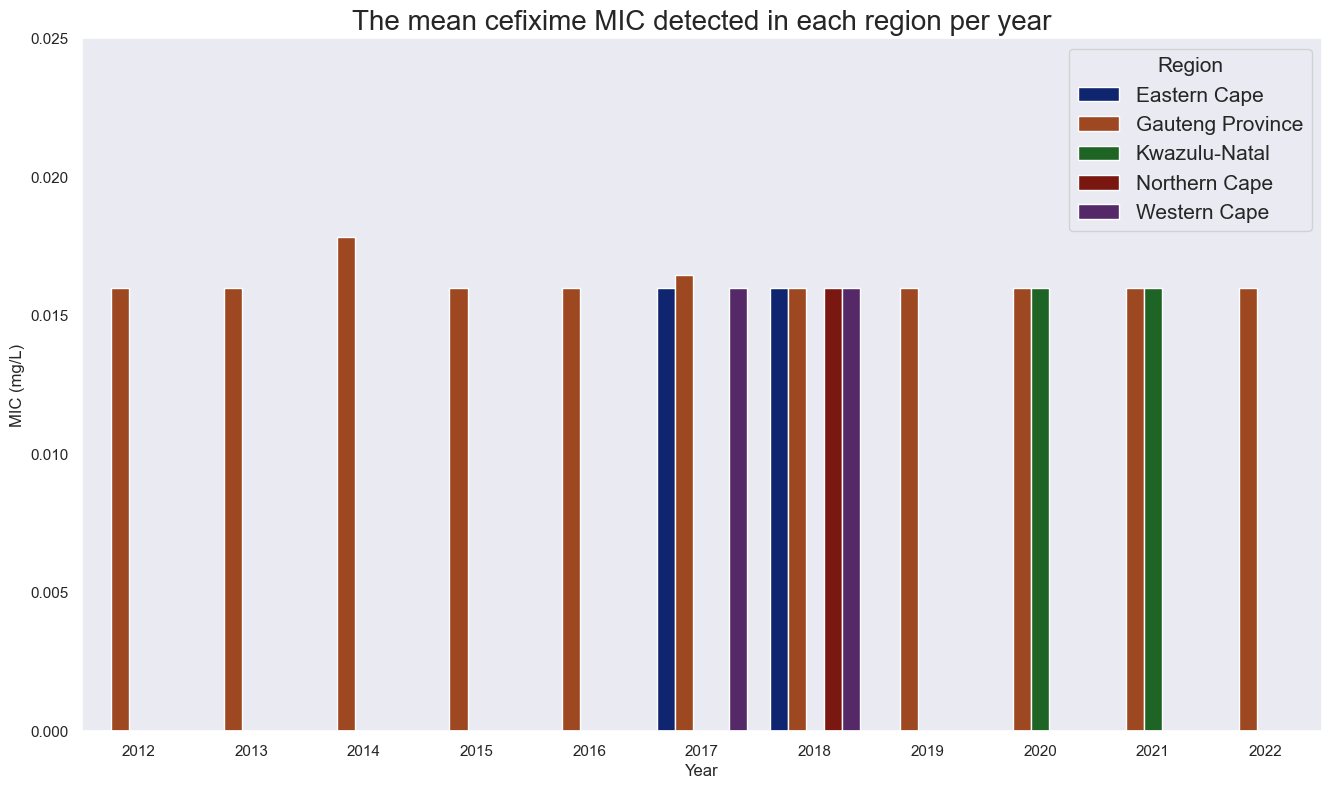

In [114]:
    # filtering for cefixime...
my_cef_mic: pd.DataFrame = my_amr_mic.drop(columns = ["azi_mic", "ceftri_mic"])

    # removing rows without MIC data
my_cef_mic_clean: pd.DataFrame = my_cef_mic.dropna(subset = "cef_mic")

    # creating a pivot table
my_cef_pivot: pd.DataFrame = my_cef_mic_clean.pivot_table(index = "year", columns = "region", values = "cef_mic", aggfunc = "mean")


    # melting the pivot table
my_cef_melt: pd.DataFrame = my_cef_pivot.reset_index().melt(id_vars = "year", var_name = "region", value_name = "cef_mic")


    # plotting bar graph with Seaborn
fig = plt.figure(figsize = (16,9))

sns.barplot(data = my_cef_melt, x = "year", y = "cef_mic", hue = "region", palette = "dark")

#plt.tight_layout()
plt.ylim(0, 0.025)
plt.xlabel("Year")
plt.ylabel("MIC (mg/L)")
plt.title("The mean cefixime MIC detected in each region per year", fontsize = 20)
plt.legend(title = "Region", title_fontsize = 15, fontsize = 15)

plt.show()



Same process as before, but with Cefixime MIC. The figure shows a very consistent mean MIC throughout the years and in each region.

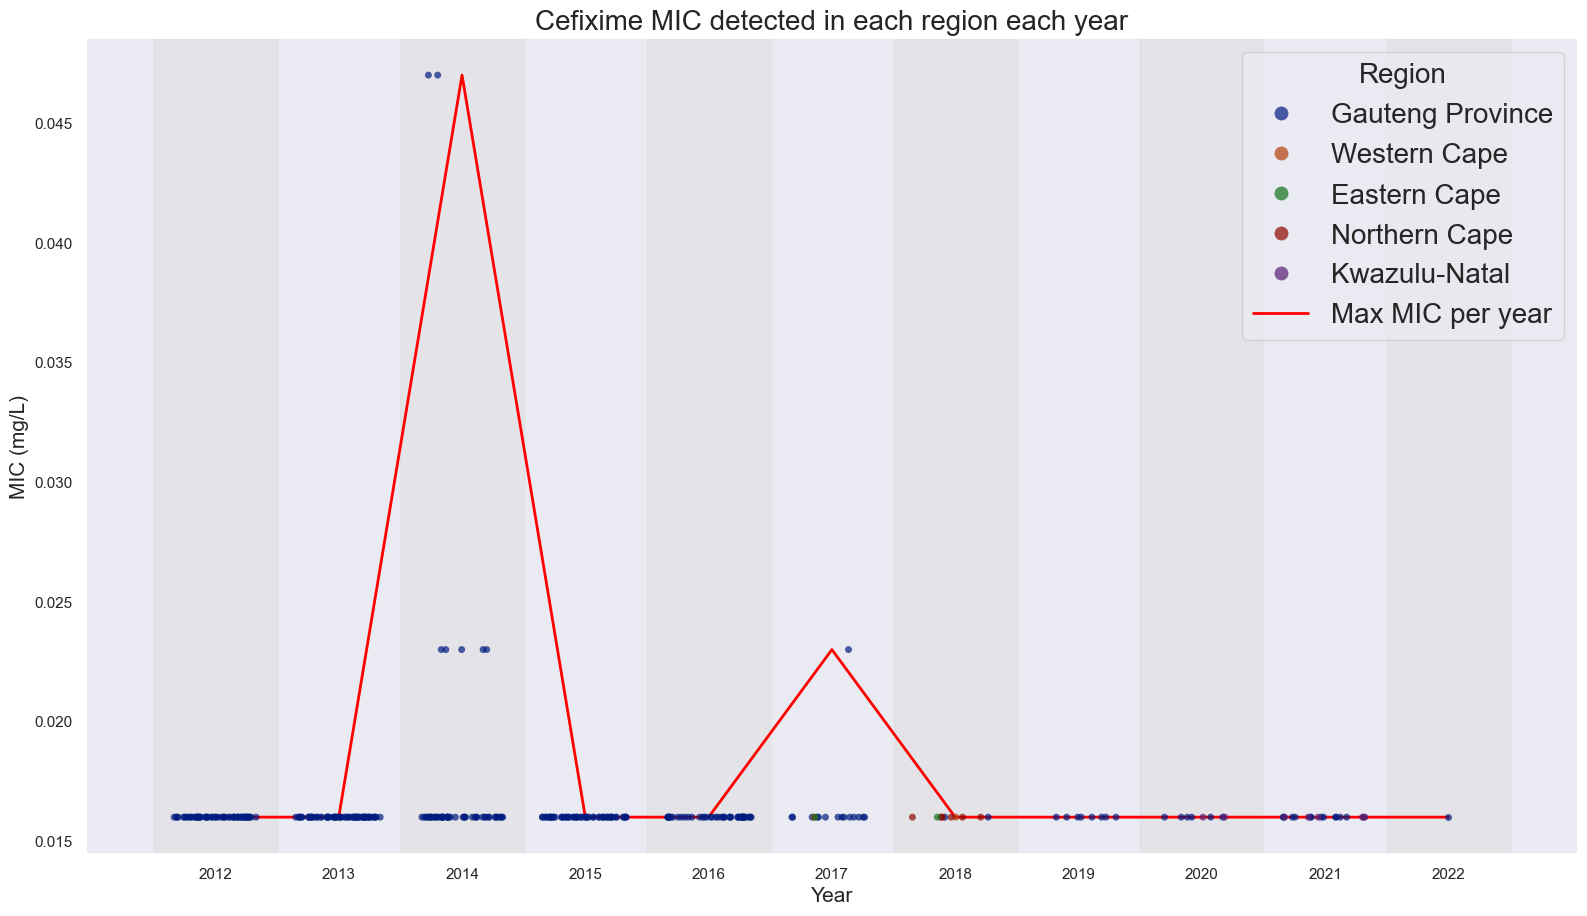

In [326]:
    # replacing NaNs in "region" columns
my_cef_mic_clean.loc[:, "region"] = my_cef_mic_clean["region"].fillna("NA")

    # extracting the maximum cefixime MIC each year 
max_cef_mic: pd.Series = my_cef_mic_clean.groupby("year")["cef_mic"].max().reset_index()

    # converting "year" to a categorical variable and aligning them to the "year" in my_cef_mic_clean
max_cef_mic["year"] = pd.Categorical(values = max_cef_mic["year"], categories = my_cef_mic_clean["year"].unique(), ordered = True)

    # setting a random seed
np.random.seed(21)

    # plotting the graph
sns.set_theme(style = "dark")

fig = plt.figure(figsize = (16,9))
    
    # strip plot
sns.stripplot(data = my_cef_mic_clean, x = "year", y = "cef_mic", hue = "region", palette = "dark", alpha = 0.7, jitter = 0.35)

    # adding a line for max MIC values each year
plt.plot(max_cef_mic["year"].cat.codes, max_cef_mic["cef_mic"], color="red", linewidth=2, label="Max MIC per year")


    # extracting unique years
unique_years2 = my_cef_mic_clean["year"].unique()

    # visually separating years with alternating rectangles 
for i, year in enumerate(unique_years2):
        if i % 2 == 0:
            plt.axvspan(i - 0.5, i + 0.5, color='lightgrey', alpha=0.3)
        

plt.tight_layout()
plt.title("Cefixime MIC detected in each region each year", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("MIC (mg/L)", fontsize = 15)
plt.legend(title = "Region", title_fontsize = 20, fontsize = 20, markerscale = 2)

plt.show()


Now looking at the distribution of cefixime MIC in my South African sample, there are a few outlying MIC values. However, with the EUCAST cefixime breakpoint value being 0.125 mg/L, the ng population is still susceptible to the antimicrobial.

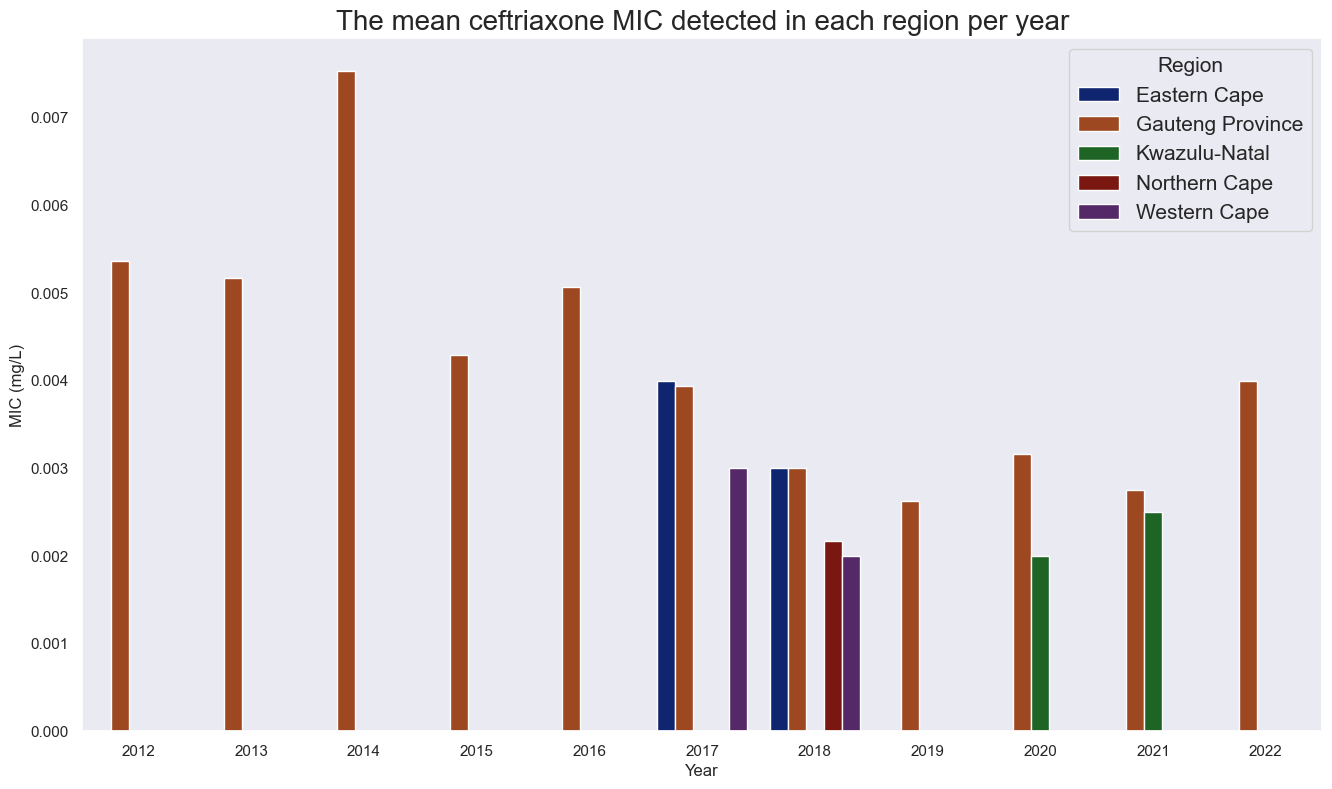

In [115]:
    # filtering for ceftriaxone... 
my_ceftri_mic: pd.DataFrame = my_amr_mic.drop(columns = ["azi_mic", "cef_mic"])

    # removing rows without MIC data
my_ceftri_mic_clean: pd.DataFrame = my_ceftri_mic.dropna(subset = "ceftri_mic")

    # creating a pivot table
my_ceftri_pivot: pd.DataFrame = my_ceftri_mic_clean.pivot_table(index = "year", columns = "region", values = "ceftri_mic", aggfunc = "mean")


    # melting the pivot table
my_ceftri_melt: pd.DataFrame = my_ceftri_pivot.reset_index().melt(id_vars = "year", var_name = "region", value_name = "ceftri_mic")


    # plotting bar graph with Seaborn
fig = plt.figure(figsize = (16,9))

sns.barplot(data = my_ceftri_melt, x = "year", y = "ceftri_mic", hue = "region", palette = "dark")

#plt.tight_layout()
plt.xlabel("Year")
plt.ylabel("MIC (mg/L)")
plt.title("The mean ceftriaxone MIC detected in each region per year", fontsize = 20)
plt.legend(title = "Region", title_fontsize = 15, fontsize = 15)

plt.show()



Same process as before, but with Ceftriaxone MIC. The figure shows a very interesting sigmoidal pattern in Ceftriaxone MIC. Although the largest mean MIC is < 0.007 mg/L (2014), ceftriaxone MIC appears to be rising again, which needs to be investigated. 


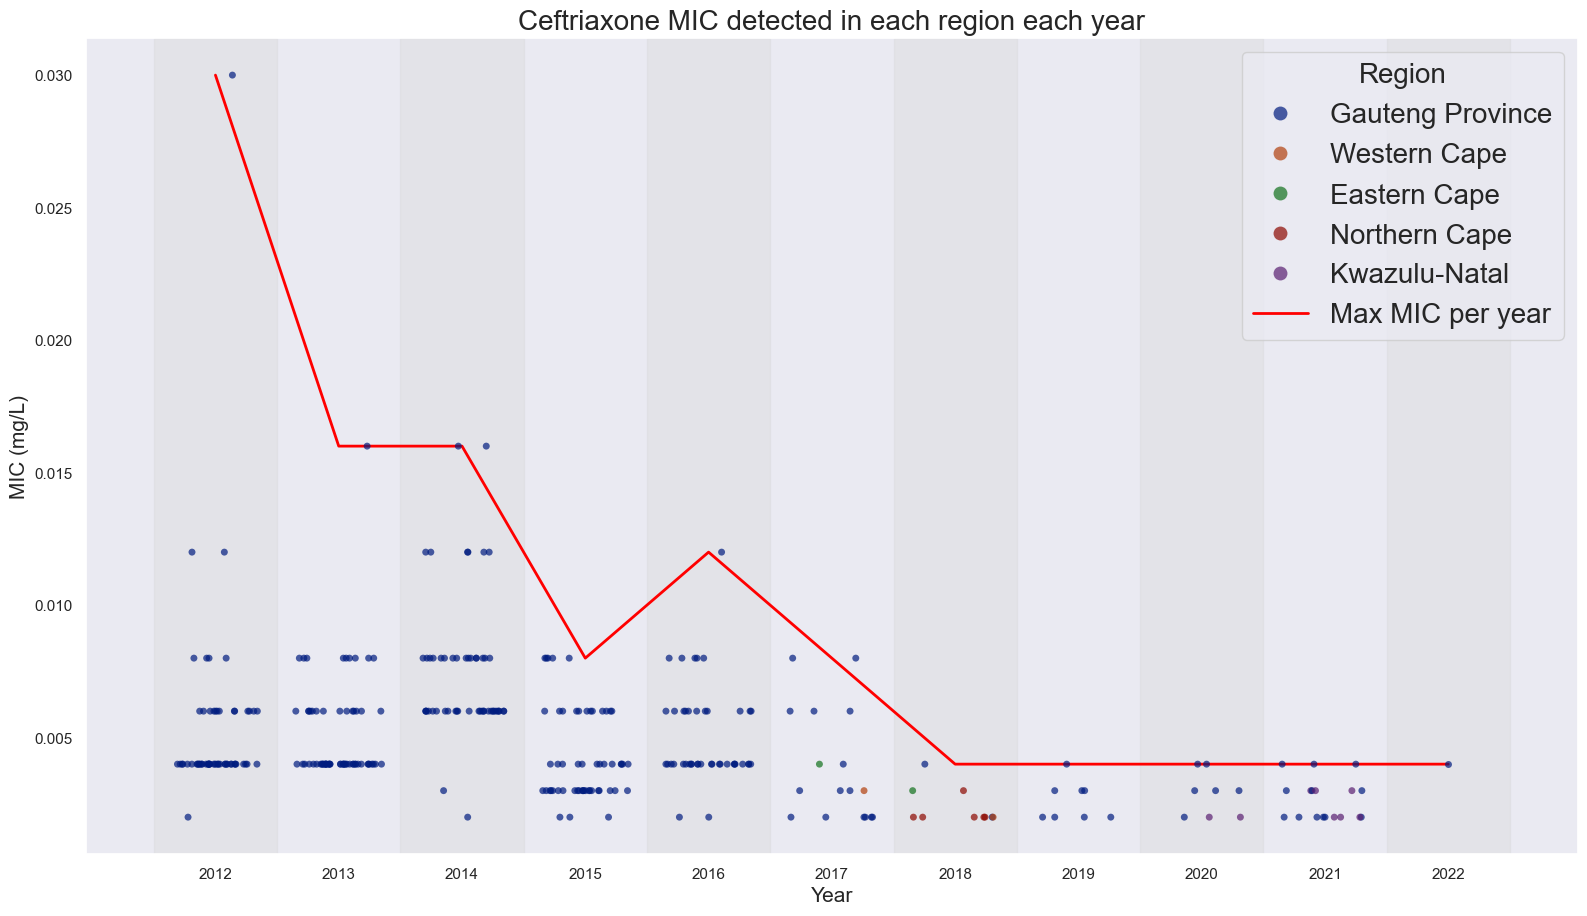

In [332]:
    # replacing NaNs in "region" columns
my_ceftri_mic_clean.loc[:, "region"] = my_ceftri_mic_clean["region"].fillna("NA")    
    
    # extracting the maximum ceftriaxone MIC each year 
max_ceftri_mic: pd.Series = my_ceftri_mic_clean.groupby("year")["ceftri_mic"].max().reset_index()

    # converting "year" to a categorical variable and aligning them to the "year" in my_ceftri_mic_clean
max_ceftri_mic["year"] = pd.Categorical(values = max_ceftri_mic["year"], categories = my_ceftri_mic_clean["year"].unique(), ordered = True)


    # setting a random seed
np.random.seed(123)

    # plotting the graph
sns.set_theme(style = "dark")

fig = plt.figure(figsize = (16,9))
    
    # strip plot
sns.stripplot(data = my_ceftri_mic_clean, x = "year", y = "ceftri_mic", hue = "region", palette = "dark", alpha = 0.7, jitter = 0.35)

    # adding a line for max MIC values each year
plt.plot(max_ceftri_mic["year"].cat.codes, max_ceftri_mic["ceftri_mic"], color="red", linewidth=2, label="Max MIC per year")


    # extracting unique years
unique_years3 = my_ceftri_mic_clean["year"].unique()

    # visually separating years with alternating rectangles 
for i, year in enumerate(unique_years3):
        if i % 2 == 0:
            plt.axvspan(i - 0.5, i + 0.5, color='lightgrey', alpha=0.3)
        

plt.tight_layout()
plt.title("Ceftriaxone MIC detected in each region each year", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("MIC (mg/L)", fontsize = 15)
plt.legend(title = "Region", title_fontsize = 20, fontsize = 20, markerscale = 2)

plt.show()


Once looking at the distribution of MIC values, the sigmoidal pattern is lost and can be explained by the small sample size in later years. With only 1 MIC value recorded for 2022, the mean MIC is equal to that value, which leads to the impression of a climb in MIC. Nevertheless, there is evidently a decline between 2012-2018 in the max MIC values observed, which is still a point of interest. Furthermore, with a EUGASP ciprofloxacin breakpoint of 0.125 (mg/L), the population is still very susceptible.

In [116]:
    #
my_azi_mean: pd.DataFrame = pd.DataFrame(my_azi_pivot.mean(axis = 1))

my_azi_mean.rename(columns = {0: "mean_mic"}, inplace = True)

my_azi_mean["antimicrobial"] = "azithromycin"
    
    #  
my_cef_mean: pd.DataFrame = pd.DataFrame(my_cef_pivot.mean(axis = 1))

my_cef_mean.rename(columns = {0: "mean_mic"}, inplace = True)

my_cef_mean["antimicrobial"] = "cefixime"


    #
my_ceftri_mean: pd.DataFrame = pd.DataFrame(my_ceftri_pivot.mean(axis = 1))

my_ceftri_mean.rename(columns = {0: "mean_mic"}, inplace = True)

my_ceftri_mean["antimicrobial"] = "ceftriaxone"


    # concat
my_mic_means: pd.DataFrame = pd.concat([my_azi_mean, my_cef_mean, my_ceftri_mean], axis = 0, join = "outer")

my_mic_means.reset_index(inplace = True)


Here, I have calculated the TOTAL mean MIC for each antimicrobial and merged them into a single DataFrame.

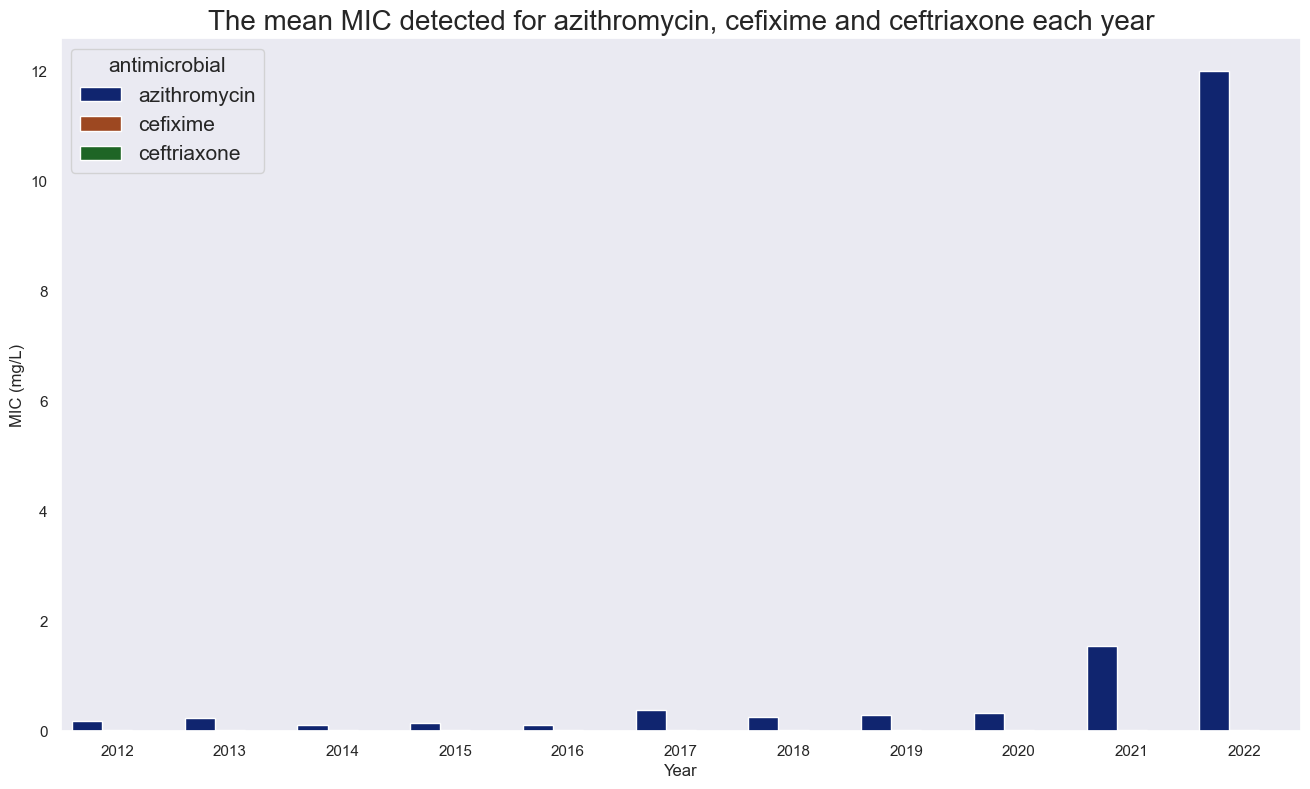

In [117]:
    # plotting bar graph with Seaborn
fig = plt.figure(figsize = (16,9))

sns.barplot(data = my_mic_means, x = "year", y = "mean_mic", hue = "antimicrobial", palette = "dark")

#plt.tight_layout()
plt.xlabel("Year")
plt.ylabel("MIC (mg/L)")
plt.title("The mean MIC detected for azithromycin, cefixime and ceftriaxone each year", fontsize = 20)
plt.legend(title = "antimicrobial", title_fontsize = 15, fontsize = 15)

plt.show()


This figure is supposed to show the mean MIC for Azithromycin, Cefixime and Ceftriaxone across the sampling period 2012-2022. However, because Azithromycin MIC is much higher than Cefixime and Ceftriaxone, the latter two antimicrobial MICs are not visible. This figure will likely not be included in my write-up (unless I find an alternative). 

#### Other South African collections


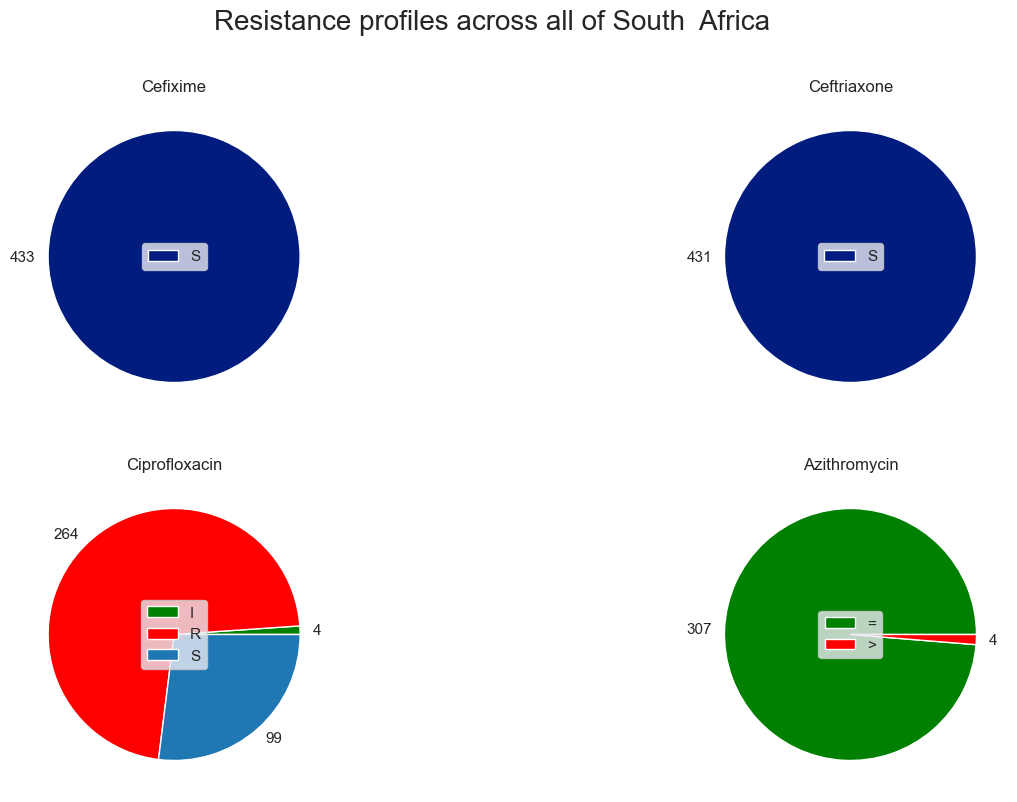

In [118]:
    # Same set of operations for phenotypic AMR data for the whole of South Africa, including my data
    
    # importing...
sa_amr: pd.DataFrame = pd.read_csv("Data/sa_amr_prof.csv", sep = ",", header = "infer")
#sa_amr.head()

    # renaming columns...
sa_amr.rename(columns = {"azithromycin_mic_sign": "azi_sign", 'cefixime_SIR': "cef_sir", 'ceftriaxone_SIR': "ceftri_sir", "ciprofloxacin_SIR": "cipro_sir"}, inplace = True)
#sa_amr.head()

    # separating data by antimicrobial...
sa_azi = sa_amr.azi_sign.dropna(axis = 0, how = "any")
sa_cef = sa_amr.cef_sir.dropna(axis = 0, how = "any")
sa_ceftri = sa_amr.ceftri_sir.dropna(axis = 0, how = "any")
sa_cipro = sa_amr.cipro_sir.dropna(axis = 0, how = "any")


    # counting frequency of S/I/R or </=/>...
amr_azi2 = sa_azi.groupby(sa_azi).count()
#print(amr_azi2)

amr_cef2 = sa_cef.groupby(sa_cef).count()
#print(amr_cef2)

amr_ceftri2 = sa_ceftri.groupby(sa_ceftri).count()
#print(amr_ceftri2)

amr_cipro2 = sa_cipro.groupby(sa_cipro).count()
#print(amr_cipro2)


    # creating a figure...
fig, ax = plt.subplots(2,2, figsize = (16,9))

    # cefixime
Functions.pie(data = amr_cef2, title = "Cefixime", ax = ax[0,0])

    # ceftriaxone
Functions.pie(data = amr_ceftri2, title = "Ceftriaxone", ax = ax[0,1])

    # ciprofloxacin
Functions.pie(data = amr_cipro2, title = "Ciprofloxacin", ax = ax[1,0],   colors = ["green", "red", "#1f77b4"])

    # azithromycin
Functions.pie(data = amr_azi2, title = "Azithromycin", ax = ax[1,1], colors = ["green", "red"])

    # adding a title to the figure
fig.suptitle("Resistance profiles across all of South  Africa", fontsize = 20)

plt.show()


This figure depicts the same type of information as the above figure, however represents *all* South African isolates available on PubMLST.

##### MIC through time

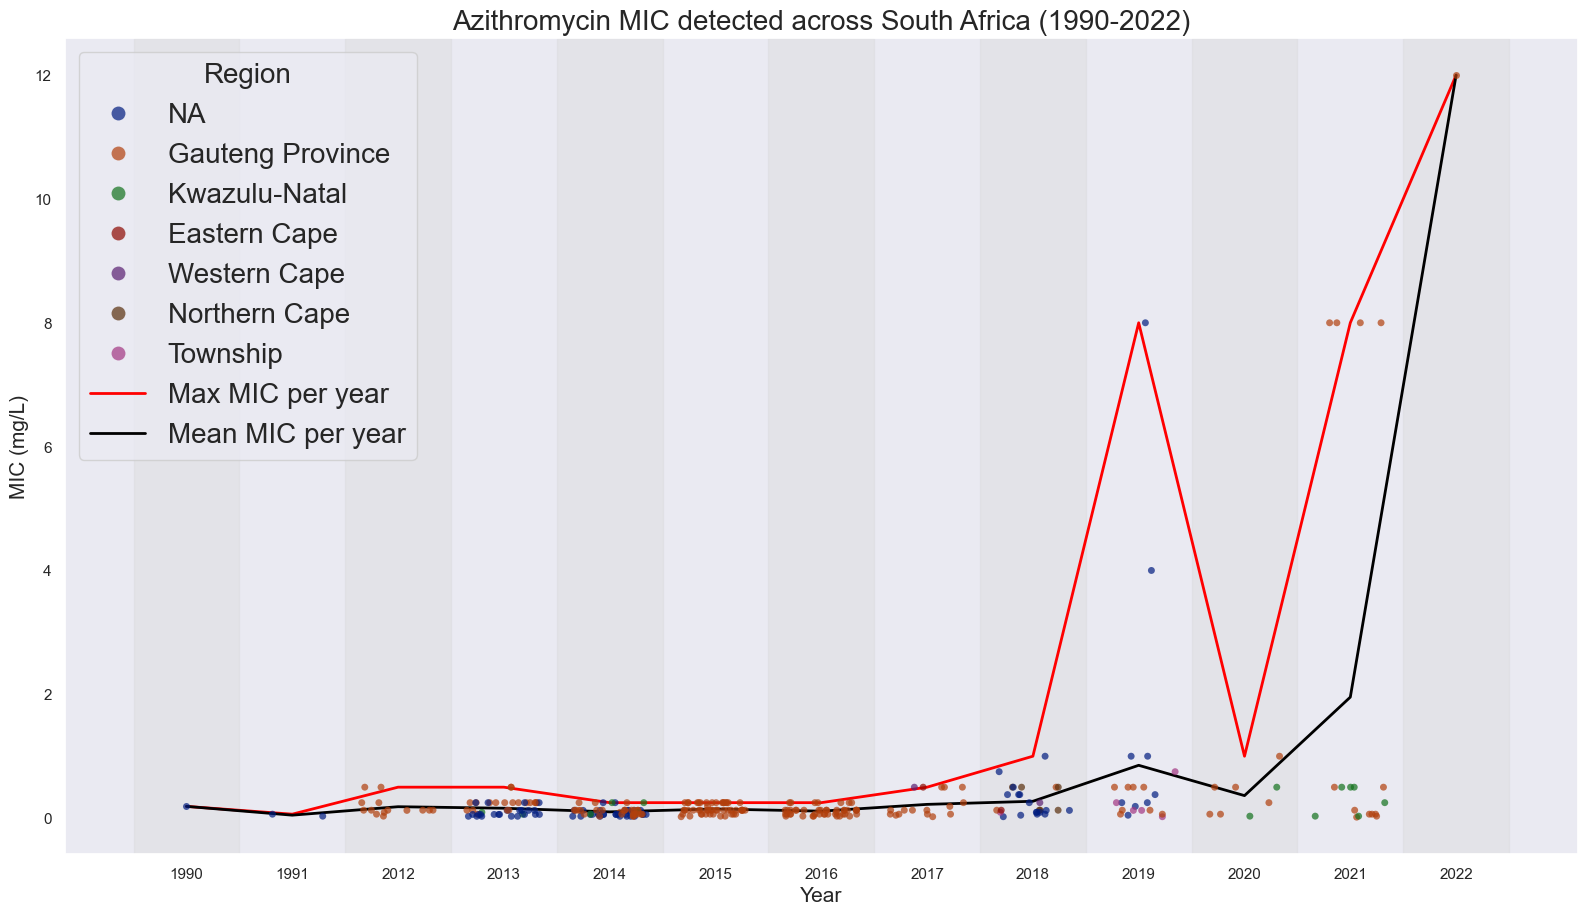

In [359]:
    # importing MIC data
sa_amr_mic: pd.DataFrame = pd.read_csv("Data/sa_amr_mic.csv", sep = ",", header = "infer")

    # cleaning function
Functions.clean(df = sa_amr_mic, rename_cols = {"azithromycin_mic": "azi_mic", "cefixime_mic": "cef_mic", "ceftriaxone_mic": "ceftri_mic"}, replace_val = {"Gauteng": "Gauteng Province", "KwaZulu Natal": "Kwazulu-Natal", "KwaZulu-Natal": "Kwazulu-Natal"})

    
    # filtering for azithromycin MIC data 
sa_azi_mic: pd.DataFrame = sa_amr_mic.drop(columns = ["cef_mic", "ceftri_mic"])

    # removing rows without MIC data
sa_azi_mic_clean: pd.DataFrame = sa_azi_mic.dropna(subset = "azi_mic")

    # replacing NaNs in "region" columns
sa_azi_mic_clean.loc[:, "region"] = sa_azi_mic_clean["region"].fillna("NA")


    # extracting the maximum azithromycin MIC each year 
sa_max_azi_mic: pd.Series = sa_azi_mic_clean.groupby("year")["azi_mic"].max().reset_index()

    # extracting the mean azithromycin MIC each year
sa_mean_azi_mic: pd.Series = sa_azi_mic_clean.groupby("year")["azi_mic"].mean().reset_index()


    # ordering by year in sa_azi_mic_clean
sa_azi_mic_clean = sa_azi_mic_clean.sort_values(by = "year", axis = 0,ascending = True)

    # converting "year" to a categorical variable and aligning them to the "year" in sa_azi_mic_clean
sa_max_azi_mic["year"] = pd.Categorical(values = sa_max_azi_mic["year"], categories = sa_azi_mic_clean["year"].unique(), ordered = True)

sa_mean_azi_mic["year"] = pd.Categorical(values = sa_mean_azi_mic["year"], categories = sa_azi_mic_clean["year"].unique(), ordered = True)

    # converting "year" in sa_azi_mic_clean to an integer to remove decimal points
sa_azi_mic_clean["year"] = sa_azi_mic_clean["year"].astype(int)


    # setting a random seed
np.random.seed(212)

    # plotting the graph
sns.set_theme(style = "dark")

fig = plt.figure(figsize = (16,9))
    
    # strip plot
sns.stripplot(data = sa_azi_mic_clean, x = "year", y = "azi_mic", hue = "region", palette = "dark", alpha = 0.7, jitter = 0.35)

    # adding a line for max MIC values each year
plt.plot(sa_max_azi_mic["year"].cat.codes, sa_max_azi_mic["azi_mic"], color="red", linewidth=2, label="Max MIC per year")
    # adding a line for mean MIC values each year
plt.plot(sa_mean_azi_mic["year"].cat.codes, sa_mean_azi_mic["azi_mic"], color="black", linewidth=2, label="Mean MIC per year")

    # extracting unique years
sa_unique_years = sa_azi_mic_clean["year"].unique()

    # visually separating years with alternating rectangles 
for i, year in enumerate(sa_unique_years):
        if i % 2 == 0:
            plt.axvspan(i - 0.5, i + 0.5, color='lightgrey', alpha=0.3)
        

plt.tight_layout()
plt.title("Azithromycin MIC detected across South Africa (1990-2022)", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("MIC (mg/L)", fontsize = 15)
plt.legend(title = "Region", title_fontsize = 20, fontsize = 20, markerscale = 2)

plt.show()


This is a strip plot for Azithromycin MIC through time across the whole of South Africa. There appears to be an emergence of AMR to Azithromycin, with a few isolates displaying disproportionately high MICs that are well above the EUCAST ECOFF of 1 mg/L. With the greatest MIC (12 mg/L) being observed in 2022, this is a concerning pattern.

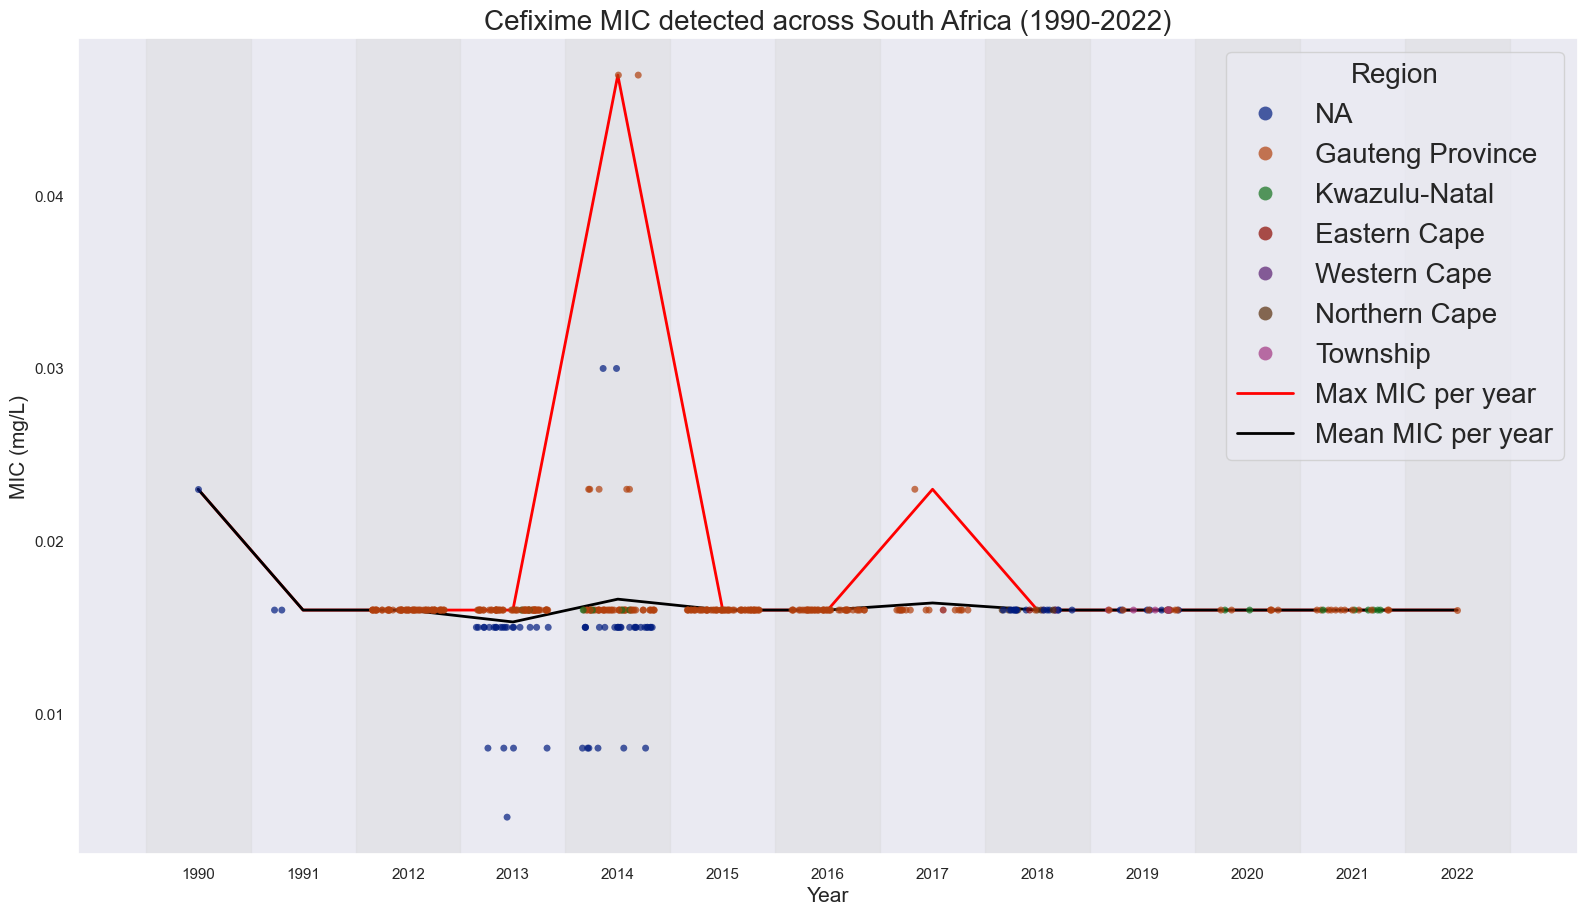

In [360]:
    # filtering for cefixime MIC data 
sa_cef_mic: pd.DataFrame = sa_amr_mic.drop(columns = ["azi_mic", "ceftri_mic"])

    # removing rows without MIC data
sa_cef_mic_clean: pd.DataFrame = sa_cef_mic.dropna(subset = "cef_mic")

    # replacing NaNs in "region" columns
sa_cef_mic_clean.loc[:, "region"] = sa_cef_mic_clean["region"].fillna("NA")


    # extracting the maximum cefixime MIC each year 
sa_max_cef_mic: pd.Series = sa_cef_mic_clean.groupby("year")["cef_mic"].max().reset_index()
 
    # extracting the mean cefixime MIC each year
sa_mean_cef_mic: pd.Series = sa_cef_mic_clean.groupby("year")["cef_mic"].mean().reset_index()


    # ordering by year in sa_cef_mic_clean
sa_cef_mic_clean = sa_cef_mic_clean.sort_values(by = "year", axis = 0,ascending = True)

    # converting "year" to a categorical variable and aligning them to the "year" in sa_cef_mic_clean
sa_max_cef_mic["year"] = pd.Categorical(values = sa_max_cef_mic["year"], categories = sa_cef_mic_clean["year"].unique(), ordered = True)

sa_mean_cef_mic["year"] = pd.Categorical(values = sa_mean_cef_mic["year"], categories = sa_cef_mic_clean["year"].unique(), ordered = True)

    # converting "year" in sa_azi_mic_clean to an integer to remove decimal points
sa_cef_mic_clean["year"] = sa_cef_mic_clean["year"].astype(int)


    # setting the random seed
np.random.seed(121)    
    
    # plotting the graph
sns.set_theme(style = "dark")

fig = plt.figure(figsize = (16,9))
    
    # strip plot
sns.stripplot(data = sa_cef_mic_clean, x = "year", y = "cef_mic", hue = "region", palette = "dark", alpha = 0.7, jitter = 0.35)

    # adding a line for max MIC values each year
plt.plot(sa_max_cef_mic["year"].cat.codes, sa_max_cef_mic["cef_mic"], color="red", linewidth=2, label="Max MIC per year")
    # adding a line for mean MIC values each year
plt.plot(sa_mean_cef_mic["year"].cat.codes, sa_mean_cef_mic["cef_mic"], color="black", linewidth=2, label="Mean MIC per year")


    # extracting unique years
sa_unique_years2 = sa_cef_mic_clean["year"].unique()

    # visually separating years with alternating rectangles 
for i, year in enumerate(sa_unique_years2):
        if i % 2 == 0:
            plt.axvspan(i - 0.5, i + 0.5, color='lightgrey', alpha=0.3)
        

plt.tight_layout()
plt.title("Cefixime MIC detected across South Africa (1990-2022)", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("MIC (mg/L)", fontsize = 15)
plt.legend(title = "Region", title_fontsize = 20, fontsize = 20, markerscale = 2)

plt.show()


This is a strip plot of cefixime MIC through time across the whole of South Africa. For the most part, MIC has been very stable and at low levels. There are a few isolates (2014 & 2017) that display a higher MIC than the average isolate, however they are still well below the EUCAST breakpoint of 0.125 mg/L so aren't of much concern. 

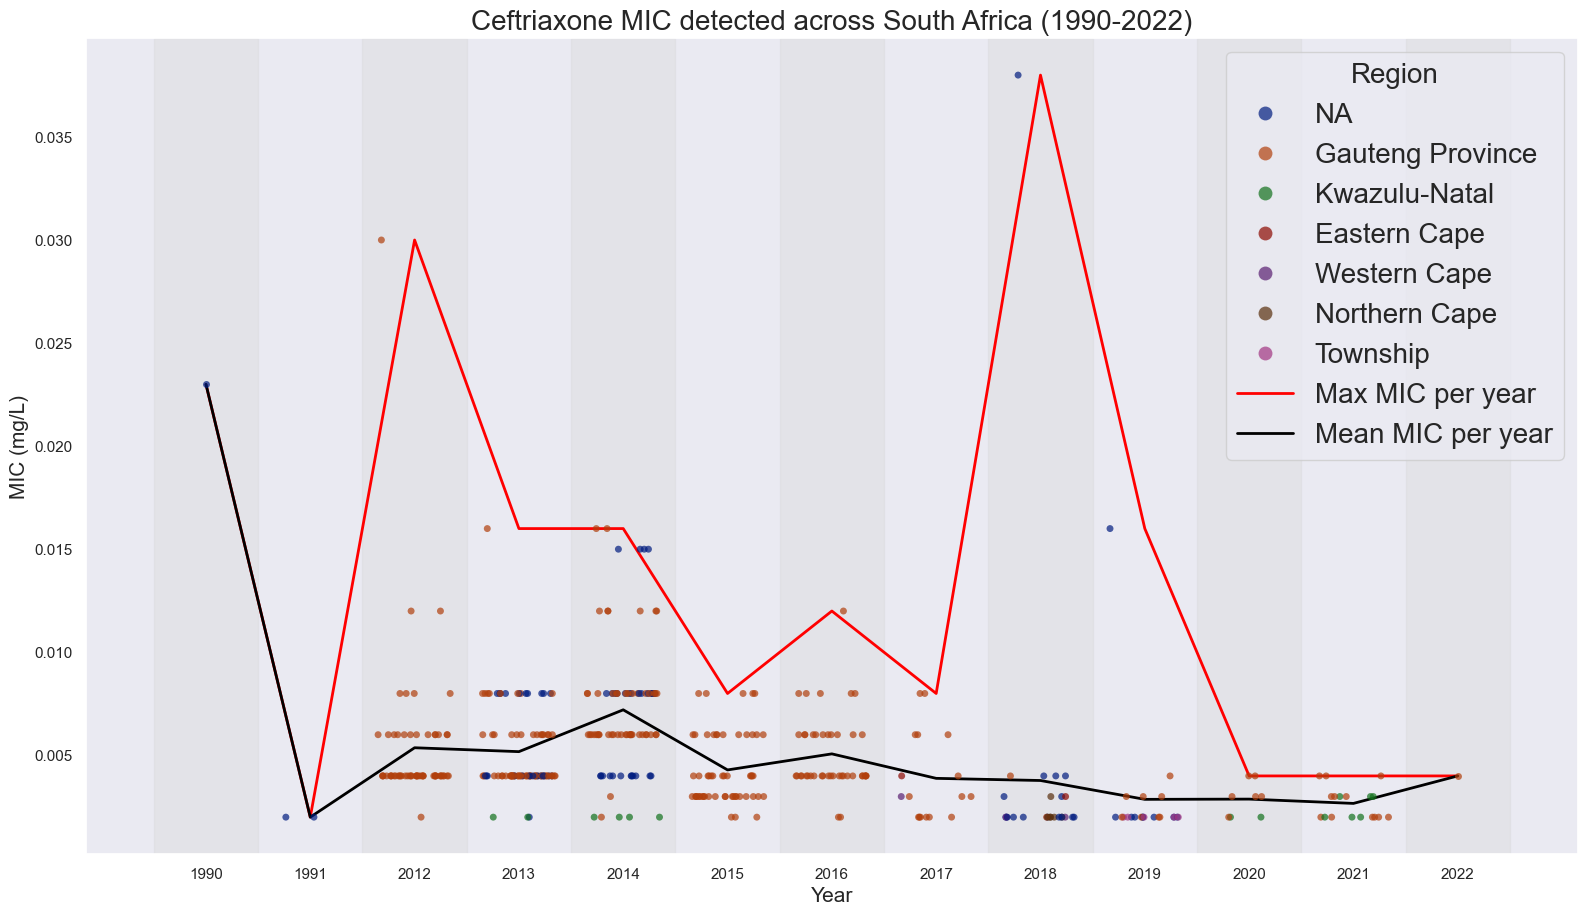

In [361]:
    # filtering for ceftriaxone MIC data 
sa_ceftri_mic: pd.DataFrame = sa_amr_mic.drop(columns = ["azi_mic", "cef_mic"])

    # removing rows without MIC data
sa_ceftri_mic_clean: pd.DataFrame = sa_ceftri_mic.dropna(subset = "ceftri_mic")

    # replacing NaNs in "region" columns
sa_ceftri_mic_clean.loc[:, "region"] = sa_ceftri_mic_clean["region"].fillna("NA")


    # extracting the maximum ceftriaxone MIC each year 
sa_max_ceftri_mic: pd.Series = sa_ceftri_mic_clean.groupby("year")["ceftri_mic"].max().reset_index()

    # extracting the mean ceftriaxone MIC each year
sa_mean_ceftri_mic: pd.Series = sa_ceftri_mic_clean.groupby("year")["ceftri_mic"].mean().reset_index()


    # ordering by year in sa_ceftri_mic_clean
sa_ceftri_mic_clean = sa_ceftri_mic_clean.sort_values(by = "year", axis = 0,ascending = True)

    # converting "year" to a categorical variable and aligning them to the "year" in sa_ceftri_mic_clean
sa_max_ceftri_mic["year"] = pd.Categorical(values = sa_max_ceftri_mic["year"], categories = sa_ceftri_mic_clean["year"].unique(), ordered = True)

sa_mean_ceftri_mic["year"] = pd.Categorical(values = sa_mean_ceftri_mic["year"], categories = sa_ceftri_mic_clean["year"].unique(), ordered = True)

    # converting "year" in sa_azi_mic_clean to an integer to remove decimal points
sa_ceftri_mic_clean["year"] = sa_ceftri_mic_clean["year"].astype(int)


    # setting the random seed
np.random.seed(313)    
    
    # plotting the graph
sns.set_theme(style = "dark")

fig = plt.figure(figsize = (16,9))
    
    # strip plot
sns.stripplot(data = sa_ceftri_mic_clean, x = "year", y = "ceftri_mic", hue = "region", palette = "dark", alpha = 0.7, jitter = 0.35)

    # adding a line for max MIC values each year
plt.plot(sa_max_ceftri_mic["year"].cat.codes, sa_max_ceftri_mic["ceftri_mic"], color="red", linewidth=2, label="Max MIC per year")
    # adding a line for mean MIC values each year
plt.plot(sa_mean_ceftri_mic["year"].cat.codes, sa_mean_ceftri_mic["ceftri_mic"], color="black", linewidth=2, label="Mean MIC per year")

    # extracting unique years
sa_unique_years3 = sa_ceftri_mic_clean["year"].unique()

    # visually separating years with alternating rectangles 
for i, year in enumerate(sa_unique_years3):
        if i % 2 == 0:
            plt.axvspan(i - 0.5, i + 0.5, color='lightgrey', alpha=0.3)
        

plt.tight_layout()
plt.title("Ceftriaxone MIC detected across South Africa (1990-2022)", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("MIC (mg/L)", fontsize = 15)
plt.legend(title = "Region", title_fontsize = 20, fontsize = 20, markerscale = 2)

plt.show()


This is a strip plot of ceftriaxone MIC through time across the whole of South Africa. Like cefixime, the MIC of ceftriaxone is consistently low, with only a couple of outlying strains. With a EUCAST breakpoint of 0.125 mg/L, the population is still susceptible to ceftriaxone. 

#### Other African collections

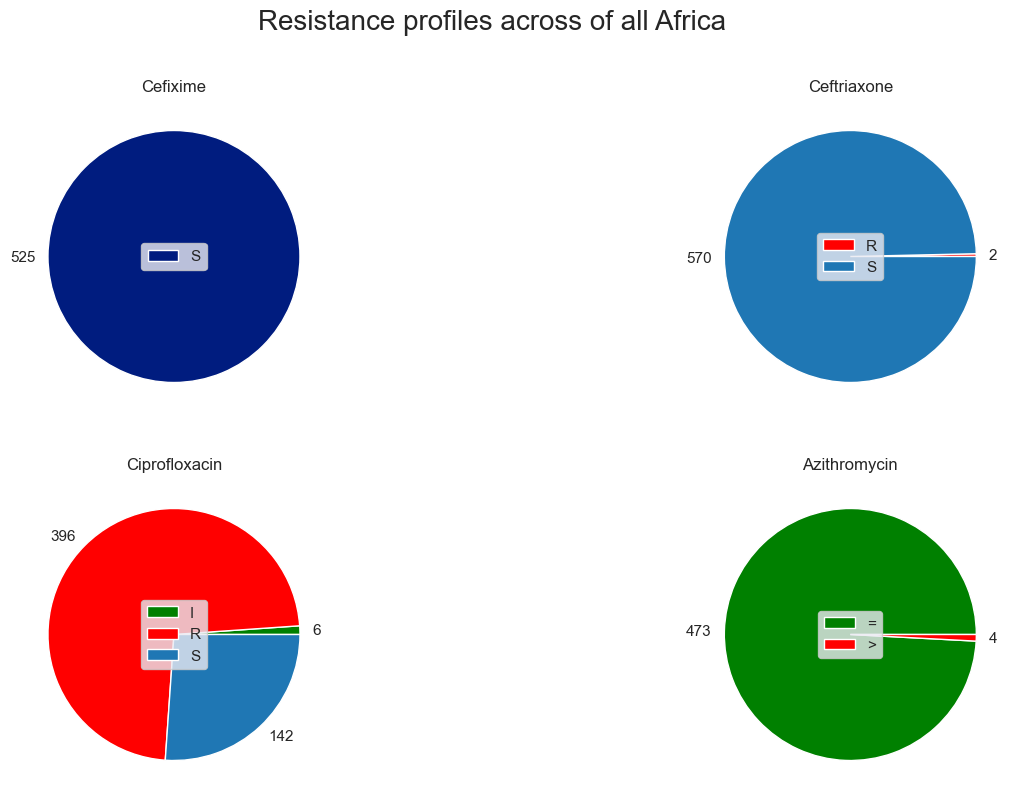

In [119]:
    # same process for phenotypic AMR data from across the continent of Africa, including my data
    
    # importing...
afr_amr: pd.DataFrame = pd.read_csv("Data/afr_amr_prof.csv", sep = ",", header = "infer")
#afr_amr.head()

    # renaming columns...
afr_amr.rename(columns = {"azithromycin_mic_sign": "azi_sign", 'cefixime_SIR': "cef_sir", 'ceftriaxone_SIR': "ceftri_sir", "ciprofloxacin_SIR": "cipro_sir"}, inplace = True)
#afr_amr.head()


    # separating data my antimicrobial...
afr_azi = afr_amr.azi_sign.dropna(axis = 0, how = "any")
afr_cef = afr_amr.cef_sir.dropna(axis = 0, how = "any")
afr_ceftri = afr_amr.ceftri_sir.dropna(axis = 0, how = "any")
afr_cipro = afr_amr.cipro_sir.dropna(axis = 0, how = "any")


    # counting frequency of S/I/R or </=/>...
amr_azi3 = afr_azi.groupby(afr_azi).count()
#print(amr_azi3)

amr_cef3 = afr_cef.groupby(afr_cef).count()
#print(amr_cef3)

amr_ceftri3 = afr_ceftri.groupby(afr_ceftri).count()
#print(amr_ceftri3)

amr_cipro3 = afr_cipro.groupby(afr_cipro).count()
#print(amr_cipro3)


    # creating a figure... 
fig, ax = plt.subplots(2,2, figsize = (16,9))

    # cefixime
Functions.pie(data = amr_cef3, title = "Cefixime", ax = ax[0,0])

    # ceftriaxone
Functions.pie(data = amr_ceftri3, title = "Ceftriaxone", ax = ax[0,1], colors = ["red", "#1f77b4"])

    # ciprofloxacin
Functions.pie(data = amr_cipro3, title = "Ciprofloxacin", ax = ax[1,0],  colors = ["green", "red", "#1f77b4"])

    # azithromycin
Functions.pie(data = amr_azi3, title = "Azithromycin", ax = ax[1,1], colors = ["green", "red"])

    # adding a title to the figure
fig.suptitle("Resistance profiles across of all Africa", fontsize = 20)

plt.show()


This figure depicts the same type of information as the previous two figures, but reflects available isolate records from across the entire continent of Africa.

### LIN Code

In [120]:
    # Import LIN code data
my_lin: pd.DataFrame = pd.read_csv("Data/mydata_cgmlst_lin.csv", sep = ",", header = "infer")
#my_lin

    
    # Cleaning the dataframe...
Functions.clean(my_lin, rename_cols = {"LINcode (N. gonorrhoeae cgMLST v2)": "lincode", "cgST (N. gonorrhoeae cgMLST v2)": "cgst", "LINcode (N. gonorrhoeae cgMLST v2).1": "LIN1"}, drop_col = list(range(5,15)), replace_val = {"_": np.nan, "__": np.nan, "___": np.nan})
    
    # Making LIN code prefixes categorical variables
my_lin.LIN1 = my_lin.LIN1.astype(str)
my_lin.LIN2 = my_lin.LIN2.astype(str)
my_lin.LIN3 = my_lin.LIN3.astype(str)
my_lin.LIN4 = my_lin.LIN4.astype(str)
#my_lin


    # Parsing out entries with no cgST/LIN code 
my_lin_missing = my_lin[my_lin["cgst"].isnull()]
#my_lin_missing
    # Counting the number of entries with no cgST/LIN code
my_lin_missing_count: pd.DataFrame = my_lin.isnull().sum()
#my_lin_missing_count

    # Identifying the entries with cgST/LIN code information
my_lin_clean: pd.DataFrame = my_lin.dropna(subset = "lincode")


    # counting the proportion of each LIN code prefix (1 bin(s))
my_lin_prop1: pd.Series = Functions.LIN_prop(df = my_lin_clean, var = "LIN1")

    # 2 bin(s)
my_lin_prop2: pd.Series = Functions.LIN_prop(df = my_lin_clean, var = "LIN2")
    
    # 3 bin(s)
my_lin_prop3: pd.Series = Functions.LIN_prop(df = my_lin_clean, var = "LIN3")

    # 4 bin(s)
my_lin_prop4: pd.Series = Functions.LIN_prop(df = my_lin_clean, var = "LIN4")


Here I have imported a dataset containing cgMSLT ST and LIN code information my South African isolates. I conducted some operations on this data:

1) Created a "missing" version of the dataset, containing rows for isolates with no cgMLST ST/LIN code.
2) Created a "cleaned" version of the dataset that only contains rows with cgMLST ST and LIN code for isolates.
3) Created a set of series containing proportion information for prefixes of 1-4 bins.
4) In each series, squashed prefixes that have a frequency of <= 3% into a new label, "Other".

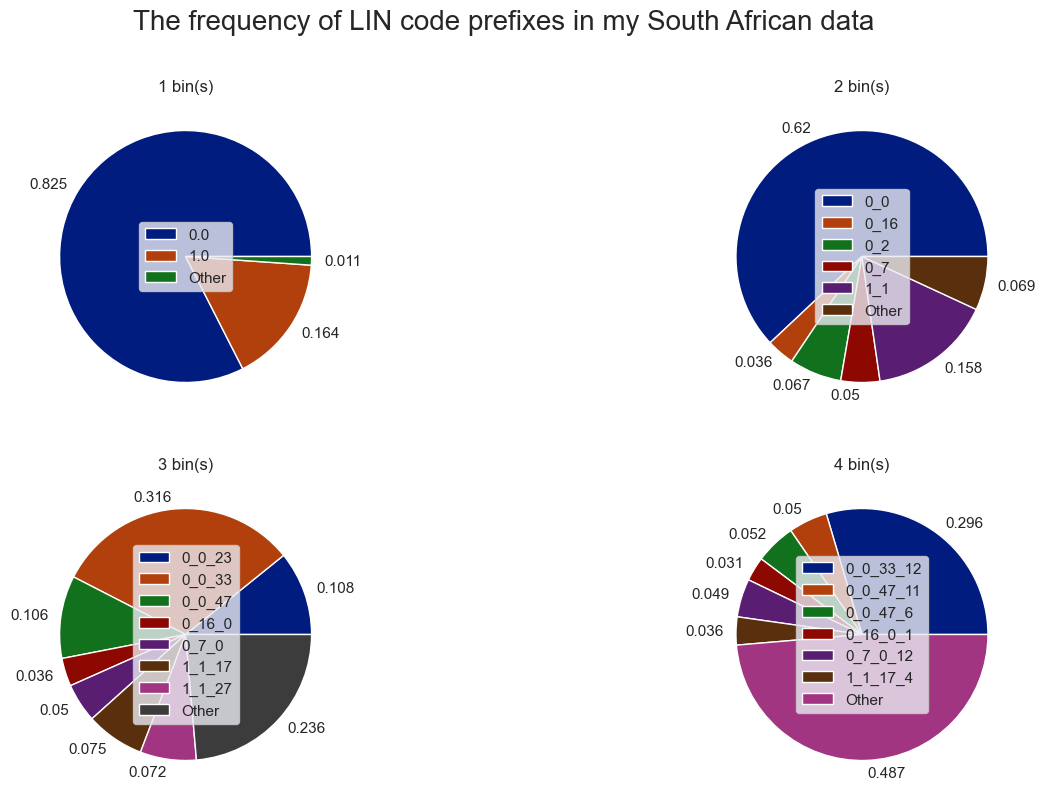

In [121]:
    # creating a figure with 4 subplots
fig, ax = plt.subplots(2,2, figsize = (16,9))

    # creating a pie chart showing proportions of LIN code prefixes with 1 bin(s)
Functions.pie(data = my_lin_prop1, title = "1 bin(s)", ax = ax[0,0])

    # ...prefixes with 2 bin(s)
Functions.pie(data = my_lin_prop2, title = "2 bin(s)", ax = ax[0,1])

    # ...prefixes with 3 bin(s)
Functions.pie(data = my_lin_prop3, title = "3 bin(s)", ax = ax[1,0])

    # ...prefixes with 4 bin(s)
Functions.pie(data = my_lin_prop4, title = "4 bin(s)", ax = ax[1,1])

fig.suptitle("The frequency of LIN code prefixes in my South African data", fontsize = 20)

plt.show()

I have created a figure with 4 subplots. Each is a pie chart showing the proportion of LIN code prefixes (at a certain number of bins) in my South African dataset.

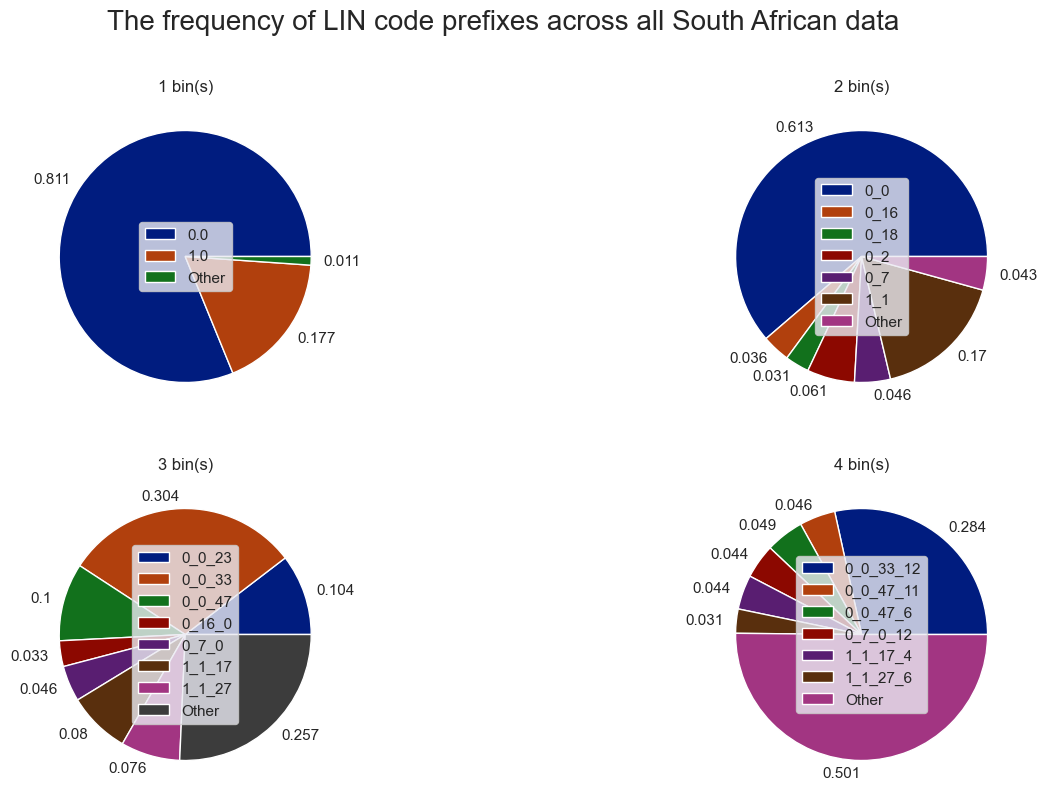

In [122]:
    # conducting the same operations for cgMLST/LIN code data for all of South Africa, including my data

    # Importing...
sa_lin: pd.DataFrame = pd.read_csv("Data/sa_cgmlst_lin.csv", sep = ",", header = "infer")
#sa_lin


    # Cleaning the dataframe...
Functions.clean(sa_lin, rename_cols = {"LINcode (N. gonorrhoeae cgMLST v2)": "lincode", "cgST (N. gonorrhoeae cgMLST v2)": "cgst", "LINcode (N. gonorrhoeae cgMLST v2).1": "LIN1"}, drop_col = list(range(7,17)), replace_val = {"_": np.nan, "__": np.nan, "___": np.nan})
    
    
    # Changing variable type...
sa_lin.LIN1 = sa_lin.LIN1.astype(str)
sa_lin.LIN2 = sa_lin.LIN2.astype(str)
sa_lin.LIN3 = sa_lin.LIN3.astype(str)
sa_lin.LIN4 = sa_lin.LIN4.astype(str)
#sa_lin


    # Parsing out entries with missing data...
sa_lin_missing = sa_lin[sa_lin["cgst"].isnull()]
#sa_lin_missing
    # Counting the number of entries with missing data...
sa_lin_missing_count: pd.DataFrame = sa_lin.isnull().sum()
#sa_lin_missing_count

    # Identifying entries with data...
sa_lin_clean: pd.DataFrame = sa_lin.dropna(subset = "lincode")


    # Counting the proportion of prefixes, 1 bin(s)...
sa_lin_prop1: pd.Series = Functions.LIN_prop(df = sa_lin_clean, var = "LIN1")

    # 2 bin(s)
sa_lin_prop2: pd.Series = Functions.LIN_prop(df = sa_lin_clean, var = "LIN2")
    
    # 3 bin(s)
sa_lin_prop3: pd.Series = Functions.LIN_prop(df = sa_lin_clean, var = "LIN3")

    # 4 bin(s)
sa_lin_prop4: pd.Series = Functions.LIN_prop(df = sa_lin_clean, var = "LIN4")


    # creating a figure...
fig, ax = plt.subplots(2,2, figsize = (16,9))

    # creating a pie chart showing proportions of LIN code prefixes with 1 bin(s)
Functions.pie(data = sa_lin_prop1, title = "1 bin(s)", ax = ax[0,0])

    # ...prefixes with 2 bin(s)
Functions.pie(data = sa_lin_prop2, title = "2 bin(s)", ax = ax[0,1])

    # ...prefixes with 3 bin(s)
Functions.pie(data = sa_lin_prop3, title = "3 bin(s)", ax = ax[1,0])

    # ...prefixes with 4 bin(s)
Functions.pie(data = sa_lin_prop4, title = "4 bin(s)", ax = ax[1,1])

fig.suptitle("The frequency of LIN code prefixes across all South African data", fontsize = 20)

plt.show()

This figure represents the same type of information as the previous figure, but for isolates collected across the whole of South Africa.

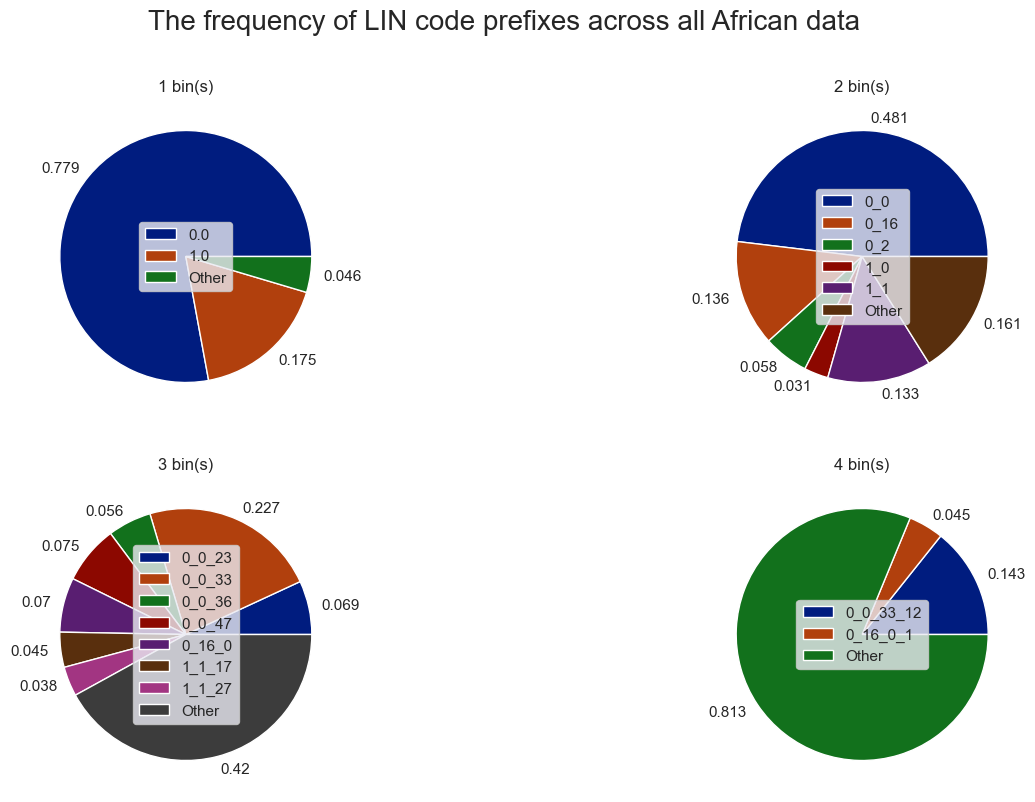

In [123]:
    # conducting the same operations for cgMLST/LIN code data for the whole of Africa, including my data

    # Importing...
afr_lin: pd.DataFrame = pd.read_csv("Data/afr_cgmlst_lin.csv", sep = ",", header = "infer")
#afr_lin


        # Cleaning the dataframe...
Functions.clean(afr_lin, rename_cols = {"LINcode (N. gonorrhoeae cgMLST v2)": "lincode", "cgST (N. gonorrhoeae cgMLST v2)": "cgst", "LINcode (N. gonorrhoeae cgMLST v2).1": "LIN1"}, drop_col = list(range(6,16)), replace_val = {"_": np.nan, "__": np.nan, "___": np.nan})
    
    
    # Changing variable type...
afr_lin.LIN1 = afr_lin.LIN1.astype(str)
afr_lin.LIN2 = afr_lin.LIN2.astype(str)
afr_lin.LIN3 = afr_lin.LIN3.astype(str)
afr_lin.LIN4 = afr_lin.LIN4.astype(str)
#afr_lin


    # Parsing out entries with missing data...
afr_lin_missing = afr_lin[afr_lin["cgst"].isnull()]
#afr_lin_missing
    # Counting the number of entries with missing data...
afr_lin_missing_count: pd.DataFrame = afr_lin.isnull().sum()
#afr_lin_missing_count

    # Identifying entries with data...
afr_lin_clean: pd.DataFrame = afr_lin.dropna(subset = "lincode")


    # Counting the proportion of prefixes, 1 bin(s)...
afr_lin_prop1: pd.Series = Functions.LIN_prop(df = afr_lin_clean, var = "LIN1")

    # 2 bin(s)
afr_lin_prop2: pd.Series = Functions.LIN_prop(df = afr_lin_clean, var = "LIN2")
    
    # 3 bin(s)
afr_lin_prop3: pd.Series = Functions.LIN_prop(df = afr_lin_clean, var = "LIN3")

    # 4 bin(s)
afr_lin_prop4: pd.Series = Functions.LIN_prop(df = afr_lin_clean, var = "LIN4")


    # creating a figure...
fig, ax = plt.subplots(2,2, figsize = (16,9))

    # creating a pie chart showing proportions of LIN code prefixes with 1 bin(s)
Functions.pie(data = afr_lin_prop1, title = "1 bin(s)", ax = ax[0,0])

    # ...prefixes with 2 bin(s)
Functions.pie(data = afr_lin_prop2, title = "2 bin(s)", ax = ax[0,1])

    # ...prefixes with 3 bin(s)
Functions.pie(data = afr_lin_prop3, title = "3 bin(s)", ax = ax[1,0])

    # ...prefixes with 4 bin(s)
Functions.pie(data = afr_lin_prop4, title = "4 bin(s)", ax = ax[1,1])

fig.suptitle("The frequency of LIN code prefixes across all African data", fontsize = 20)

plt.show()


This figure represents the same type of information as the previous two figures, but for isolates collected across the whole of the continent of Africa.

#### Identifying lineages that are unique to my South African dataset

In [124]:
    # identifying unique lineages in my South African dataset
my_lin3_df: pd.DataFrame = pd.DataFrame({"Lineage": my_lin_clean["LIN3"].unique()})
print(f"Unique lineages in my SA collection: {len(my_lin3_df["Lineage"])}")

    # removing my South African data from the African dataset
afr_removed: pd.DataFrame = afr_lin_clean[~afr_lin_clean["isolate"].isin(my_lin_clean["isolate"])]

    # finding unique lineages in my South African dataset
unique_lin: pd.DataFrame = my_lin_clean[~my_lin_clean["LIN3"].isin(afr_removed["LIN3"])]
print(f"Lineages unique to my SA collection: {len(unique_lin["LIN3"].unique())}")
print(f"These lineages are: {list((unique_lin["LIN3"].unique()))}")

    # exporting as CSV file
#uniq_lin.to_csv("Data_exp/my_uniq_lineage.csv")


Unique lineages in my SA collection: 54
Lineages unique to my SA collection: 31
These lineages are: ['0_12_10', '1_3_0', '1_1_50', '1_3_1', '0_2_73', '1_1_51', '1_1_49', '1_1_40', '0_2_71', '0_12_11', '0_2_30', '0_0_72', '0_0_64', '11_0_5', '0_0_73', '0_0_61', '0_2_72', '51_0_1', '0_0_92', '1_15_1', '0_18_28', '17_0_1', '0_0_63', '1_1_65', '0_2_1', '0_2_85', '0_2_86', '0_31_0', '0_18_24', '0_0_26', '1_1_52']


Here, I have filtered the African collection to remove all entries of isolates that are from my South African sample. I then used the filtered *African* dataset to remove isolates from *my SA* dataset that shares a lineage with any of the remaining African isolates. This reveals that there are **31 lineages** that are unique to my South African dataset. I also exported data of the SA isolates that are part of the 31 lineages  - "my_uniq_lineage.csv"

In [125]:
    # importing LIN code data for ALL available isolates
world_lin: pd.DataFrame = pd.read_csv("Data/world_lin.csv", sep = ",", header = "infer")


    # cleaning the dataframe...
Functions.clean(world_lin, rename_cols = {"LINcode (N. gonorrhoeae cgMLST v2)": "lincode", "cgST (N. gonorrhoeae cgMLST v2)": "cgst", "LINcode (N. gonorrhoeae cgMLST v2).1": "LIN1"}, drop_col = list(range(7,10)), replace_val = [{"_": np.nan, "__": np.nan, "___": np.nan}])
    
    
    # changing variable type...
world_lin.LIN1 = world_lin.LIN1.astype(str)
world_lin.LIN2 = world_lin.LIN2.astype(str)
world_lin.LIN3 = world_lin.LIN3.astype(str)
world_lin.LIN4 = world_lin.LIN4.astype(str)

print(f"Dimensions of world_lin: {world_lin.shape}")

  # removing rows with missing data
world_lin_clean: pd.DataFrame = world_lin.dropna(subset = "lincode")

print(f"Entries with LIN code data: {len(world_lin_clean.index)}")


    # filtering out all African lineages from the World dataset
world_no_afr: pd.DataFrame = world_lin_clean[~world_lin_clean["isolate"].isin(afr_lin_clean["isolate"])]
print(f"There are {len(world_no_afr.index)} isolates from outside of Africa with a LIN code")

    # 
match_lin: pd.DataFrame = world_no_afr[world_no_afr["LIN3"].isin(unique_lin["LIN3"])]
print(f"Of the LIN codes that were unique to my South African sample, {len(match_lin["LIN3"].unique())} of them are found outside of Africa.")
print(f"These LIN codes are: {match_lin["LIN3"].unique()}")
    

Dimensions of world_lin: (32879, 10)
Entries with LIN code data: 24683
There are 23225 isolates from outside of Africa with a LIN code
Of the LIN codes that were unique to my South African sample, 2 of them are found outside of Africa.
These LIN codes are: ['0_2_1' '0_0_26']


Here, I have imported LIN code data for **all available Ng isolates** on PubMLST. After comparing the lineages from Africa that are unique to my South African collection, I have found that **2** of these lineages are also found outside of Africa. This suggests that those South African isolates are more closely related to some non-African isolates than African isolates. 

In [126]:
    # creating a new DataFrame with isolates that are part of the 29 unique lineages
uniq_29_strains: pd.DataFrame = unique_lin.loc[~unique_lin["LIN3"].isin(["0_2_1", "0_0_26"])]

    # dropping unneeded columns
uniq_29_strains = uniq_29_strains.drop(uniq_29_strains.columns[[2,3,4,5,7]], axis = 1)


    # creating a new DataFrame with only lineage information
uniq_29: pd.DataFrame = pd.DataFrame(uniq_29_strains.groupby("LIN3")["isolate"].count().reset_index())
    # renaming column names
uniq_29.rename(columns = {"LIN3": "Lineage", "isolate": "Frequency"}, inplace = True)

    # exporting data
#uniq_29.to_csv("Data_exp/uniq_29.csv")


Here, I first created a DataFrame with isolates that are from one of the 29 unique (to the world) lineages. This DataFrame was used to created another with Frequency data for each lineage. This DataFrame was exported as "uniq_29.csv".

#### Preparing metadata for MS trees

In [127]:
    # importing African meta data from GrapeTree
afr_meta = pd.read_csv("Data/afr_grape_meta.txt", sep='\t')


    # cleaning function
Functions.clean(df = afr_meta, drop_col = [0,4,5,6,8,9,10,11,12,13], rename_cols = {"LINcode (N. gonorrhoeae cgMLST v2)": "LIN", "LINcode (N. gonorrhoeae cgMLST v2)[3]": "Lineage"})

print(f"GrapeTree creates a MS tree of African isolates using {len(afr_meta.index)} isolates with assembled genomes")


   # marking each row depending on whether it's an isolate from my South African collection
afr_meta["mydata"] = afr_meta["ID"].isin(my_lin["id"]).apply(lambda x: "Y" if x else "N")

    # confirm my SA collection sample size
print(f"{afr_meta[afr_meta["mydata"] == "Y"].mydata.count()} - this is the number of genomes in my South African sample")

    # exporting
#afr_meta.to_csv("Data_exp/afr_meta.csv")


GrapeTree creates a MS tree of African isolates using 1640 isolates with assembled genomes
705 - this is the number of genomes in my South African sample


Using GrapeTree I generated an MS tree for all available African isolates. I downloaded the associated metadata and added an additional column "mydata" and marked "Y" for isolates that are part of my SA dataset and "N" for those that aren't. This DataFrame has been exported as "afr_meta.csv" for use in GrapeTree. This enables me to highlight which isolates are from my SA collection.

In [128]:
    # parsing out my SA data from all SA data
other_sa: pd.DataFrame = sa_lin[~sa_lin["id"].isin(my_lin["id"])]  

    # marking each row depending on whether it's one of my South African, other South African or other isolates
afr_meta["SA"] = afr_meta.apply(lambda x: "my_SA" if x["ID"] in my_lin["id"].values else "other_SA" if x["ID"] in other_sa["id"].values else "N", axis = 1)

    
    # checking values
print(f'''Number of "my_SA": {len(afr_meta[afr_meta["SA"] == "my_SA"])}
Number of "other_SA": {len(afr_meta[afr_meta["SA"] == "other_SA"])}
Number of "N": {len(afr_meta[afr_meta["SA"] == "N"])}
Total SA: {len(afr_meta[afr_meta["SA"] == "my_SA"]) + len(afr_meta[afr_meta["SA"] == "other_SA"])}
Total: {len(afr_meta.index)}
''')

    # exporting
#afr_meta.to_csv("Data_exp/afr_meta.csv")


Number of "my_SA": 705
Number of "other_SA": 87
Number of "N": 848
Total SA: 792
Total: 1640



I first created a DataFrame containing African isolates that *aren't* part of my South African dataset. Using this DataFrame, I then marked each (all) African isolate depending on whether it is part of my SA collection, other SA collections or from other African countries. I exported this marked DataFrame as "afr_meta.csv" for use in GrapeTree, where I will be able to see if my SA isolates are more/less related to other SA isolates than isolates from other countries in Africa.

In [129]:
    # importing World metadata from GrapeTree
world_meta = pd.read_csv("Data/world_grape_meta.txt", sep='\t')


    # cleaning function
Functions.clean(df = world_meta, drop_col = [0,4,5,6,8,9,10,11,12,13], rename_cols = {"LINcode (N. gonorrhoeae cgMLST v2)": "LIN", "LINcode (N. gonorrhoeae cgMLST v2)[3]": "Lineage"})


print(f"GrapeTree creates a MS tree of all available isolates using {len(world_meta.index)} isolates with assembled genomes")


   # marking each row depending on whether it's an isolate from my South African collection
world_meta["mydata"] = world_meta["ID"].isin(my_lin["id"]).apply(lambda x: "Y" if x else "N")

    # confirm my SA collection sample size
print(f"{world_meta[world_meta["mydata"] == "Y"].mydata.count()} - this is the number of genomes in my South African sample")

    # exporting
#world_meta.to_csv("Data_exp/world_meta.csv")


GrapeTree creates a MS tree of all available isolates using 26538 isolates with assembled genomes
705 - this is the number of genomes in my South African sample


I have imported metadata from GrapeTree for an MS tree of **all** available isolates on PubMLST. After cleaning the DataFrame, I again marked which isolates are part of my SA dataset and which are not. This marked DataFrame was exported as "world_meta.csv".

NOTE - There are 704 "Y" instead of 705. Why?

In [130]:
    # parsing out my SA data from all Africa data
other_afr: pd.DataFrame = afr_lin[~afr_lin["id"].isin(my_lin["id"])]  

    # marking each row depending on whether it's one of my South African, other African or other isolates
world_meta["africa"] = world_meta.apply(lambda x: "my_SA" if x["ID"] in my_lin["id"].values else "other_afr" if x["ID"] in other_afr["id"].values else "N", axis = 1)

    
    # checking values
print(f'''Number of "my_SA": {len(world_meta[world_meta["africa"] == "my_SA"])}
Number of "other_afr": {len(world_meta[world_meta["africa"] == "other_afr"])}
Number of "N": {len(world_meta[world_meta["africa"] == "N"])}
Total Africa: {len(world_meta[world_meta["africa"] == "my_SA"]) + len(world_meta[world_meta["africa"] == "other_afr"])}
Total: {len(world_meta.index)}
''')

    # exporting
#world_meta.to_csv("Data_exp/world_meta.csv")


Number of "my_SA": 705
Number of "other_afr": 935
Number of "N": 24898
Total Africa: 1640
Total: 26538



I identified which African isolates are not part of my South African collection, then used this DataFrame to mark each (all) African isolates according to whether they are part of my SA collection, other African collections, or from other non-African countries. This DataFrame was exported as "world_meta.csv" and will be used in GrapeTree to see if my South African isolates are more/less related to other African isolates than isolates from outside of Africa.

### NG-STAR AMR data

#### PenA

In [131]:
    # importing genotypic amr data, according to the NG-STAR scheme, for my South African sample
my_ngstar_amr: pd.DataFrame = pd.read_csv("Data/my_ngstar_amr.csv", sep = ",", header = "infer")

 
    # separating out data for PenA specifically
my_pena: pd.DataFrame =  my_ngstar_amr[["id", "isolate", "region", "year", "NEIS1753(PenA)"]]


    # removing rows containing NAs
my_pena = my_pena.dropna(subset = "NEIS1753(PenA)")

    # cleaning function
Functions.clean(my_pena, rename_cols = {"NEIS1753(PenA)": "pena"}, to_str = "pena")


    # counting the frequency of each PenA allele and ranking them
my_pena_count: pd.Series = Functions.allele_rank(df = my_pena, var = "pena")


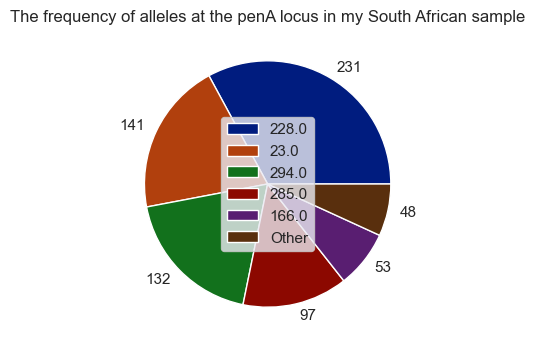

In [132]:
Functions.pie(data = my_pena_count, title = "The frequency of alleles at the penA locus in my South African sample")
plt.show()


Here, I have created a pie chart that shows the frequency of different allele ids for the PenA locus. Explicitly stated are the top 5 most frequent alleles, with all others being grouped into the "other" group.
1) allele 228: type XIX; non-mosaic; mutation(s): F504→L
2) allele 23: type II; non-mosaic; mutation(s): F504→L
3) allele 294: type XIV; non-mosaic; mutation(s): F504→L
4) allele 285: type IX; non-mosaic; mutation(s): F504→L, P551→L
5) allele 166: type II; non-mosaic; mutation(s): F504→L

While the F504L mutation is not known to be associated with resistance to any antimicrobials, there is evidence showing a statistical association between the *P551L* mutation and increased and increased MIC to ceftriaxone. 

In [133]:
    # same process but for genotypic amr data from all available South African samples...
    
    # importing
sa_ngstar_amr: pd.DataFrame = pd.read_csv("Data/sa_ngstar_amr.csv", sep=",", header="infer")

    
    # separating out PenA...
sa_pena: pd.DataFrame =  sa_ngstar_amr[["id", "isolate", "region", "year", "NEIS1753(PenA)"]]

    # removing rows containing NAs...
sa_pena = sa_pena.dropna(subset = "NEIS1753(PenA)")

    # cleaning function
Functions.clean(sa_pena, rename_cols = {"NEIS1753(PenA)": "pena"}, to_str = "pena")


    # ranking allele frequencies...
sa_pena_count: pd.Series = Functions.allele_rank(sa_pena, var = "pena")


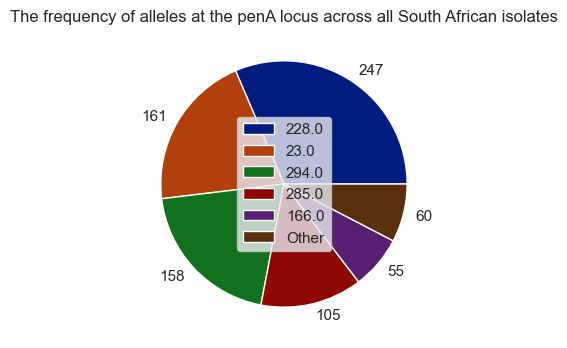

In [134]:
Functions.pie(data = sa_pena_count, title = "The frequency of alleles at the penA locus across all South African isolates")
plt.show()


This figure shows the same type of information as the previous figure, but across all South African isolates available:
1) allele 228: type XIX; non-mosaic; mutation(s): F504→L
2) allele 23: type II; non-mosaic; mutation(s): F504→L
3) allele 294: type XIV; non-mosaic; mutation(s): F504→L
4) allele 285: type IX; non-mosaic; mutation(s): F504→L, P551→L
5) allele 166: type II; non-mosaic; mutation(s): F504→L

These allele IDs are the same/in the same order as in my South African sample. While the F504L mutation is not known to be associated with resistance to any antimicrobials, there is evidence showing a statistical association between the *P551L* mutation and increased and increased MIC to ceftriaxone. 

In [135]:
    # same process but for genotypic amr data from across the whole of Africa...
    
    # importing
afr_ngstar_amr: pd.DataFrame = pd.read_csv("Data/afr_ngstar_amr.csv", sep=",", header="infer")

    
    # separating out PenA...
afr_pena: pd.DataFrame =  afr_ngstar_amr[["id", "isolate", "country", "year", "NEIS1753(PenA)"]]

    # removing rows containing NAs...
afr_pena = afr_pena.dropna(subset = "NEIS1753(PenA)")
    
    
    # cleaning function
Functions.clean(df = afr_pena, rename_cols = {"NEIS1753(PenA)": "pena"}, to_str = "pena")

    # ranking allele frequencies...
afr_pena_count: pd.Series = Functions.allele_rank(df = afr_pena, var = "pena")


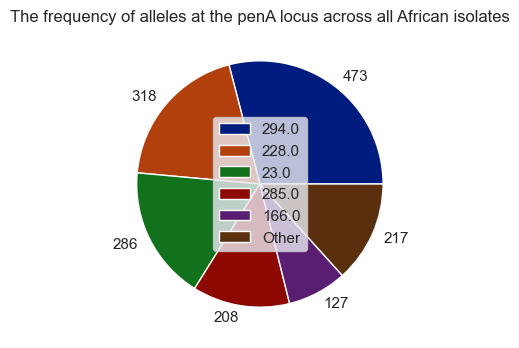

In [136]:
Functions.pie(data = afr_pena_count, title = "The frequency of alleles at the penA locus across all African isolates")
plt.show()


This figure shows the same type of information as the previous two figures, but across the continent of Africa:
1) allele 228: type XIX; non-mosaic; mutation(s): F504→L
2) allele 294: type XIV; non-mosaic; mutation(s): F504→L
3) allele 23: type II; non-mosaic; mutation(s): F504→L
4) allele 285: type IX; non-mosaic; mutation(s): F504→L, P551→L
5) allele 166: type II; non-mosaic; mutation(s): F504→L

These alleles are the same as in my South African sample/the whole of South Africa dataset. The only difference is that the Rank 2 & 3 alleles in this dataset are swapped around in the former two datasets.

While the F504L mutation is not known to be associated with resistance to any antimicrobials, there is evidence showing a statistical association between the *P551L* mutation and increased and increased MIC to ceftriaxone. 

#### 23S RNA

In [137]:
    # separating out 23S...
my_23s: pd.DataFrame =  my_ngstar_amr[["id", "isolate", "region", "year", "NG_23S"]]

    # removing rows containing NAs...
my_23s = my_23s.dropna(subset = "NG_23S")
    
    # cleaning function
Functions.clean(df = my_23s, rename_cols = {"NG_23S": "ng_23s"}, to_str = "ng_23s")


    # ranking allele frequencies...
my_23s_count = Functions.allele_rank(df = my_23s, var = "ng_23s")


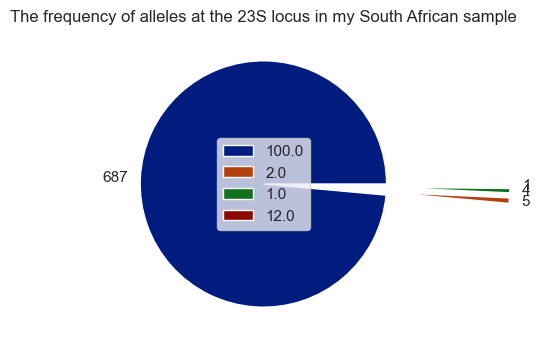

In [138]:
Functions.pie(data = my_23s_count, title = "The frequency of alleles at the 23S locus in my South African sample", exp = [0, 1, 1, 1])
plt.show()


This pie chart shows the frequency of alleles at the 23S locus (under the NG-STAR typing scheme) in my South African sample. Because there were only 4 alleles at this locus, there is no "other" segment:
1) allele 100: Wild Type
2) allele 2: Mutation(s): C2611T; Azithromycin MIC:4 Erythromycin MIC: 32
3) allele 1: Mutation(s): A2059G; Azithromycin MIC:>=512; Erythromycin MIC:>=64	
4) allele 12: Wild Type

The A2059G mutation is known to be associated with high-level resistance to erithromycin & azithromycin (macrolides). The C2611T mutations is known to be associated with low-level resistance to erithromycin & azithromycin.

Resistance to macrolides depends on the number of these resistance mutations present across an organism's **4 alleles**.


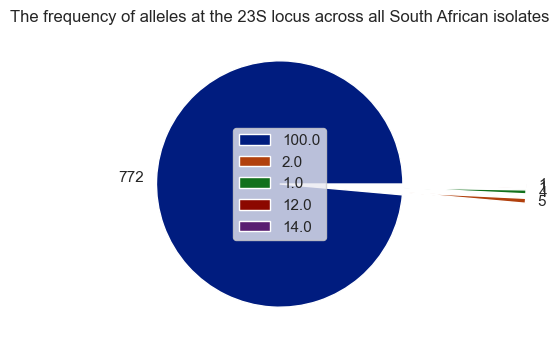

In [139]:
    # same process but for genotypic amr data from all of South Africa...

# separating out 23S RNA...
sa_23s: pd.DataFrame =  sa_ngstar_amr[["id", "isolate", "region", "year", "NG_23S"]]

    # removing rows containing NAs...
sa_23s = sa_23s.dropna(subset = "NG_23S")
    
    # cleaning function
Functions.clean(df = sa_23s, rename_cols = {"NG_23S": "ng_23s"}, to_str = "ng_23s")


    # ranking allele frequencies...
sa_23s_count = Functions.allele_rank(df = sa_23s, var = "ng_23s")


Functions.pie(data = sa_23s_count, title = "The frequency of alleles at the 23S locus across all South African isolates", exp = [0, 1, 1, 1, 1])
plt.show()


This figure shows the same type of information as the previous figure, but for all available South African isolates. Because there were only 5 alleles at this locus, there is no "other" segment:
1) allele 100: Wild Type
2) allele 2: Mutation(s): C2611T; Azithromycin MIC:4 Erythromycin MIC: 32
3) allele 1: Mutation(s): A2059G; Azithromycin MIC:>=512; Erythromycin MIC:>=64	
4) allele 12: Wild Type
5) allele **14**: Wild Type 

Alleles ranked 1-4 are the same as in my South African sample. In this sample, there is also **allele 14**. 

The A2059G mutation is known to be associated with high-level resistance to erithromycin & azithromycin (macrolides). The C2611T mutations is known to be associated with low-level resistance to erithromycin & azithromycin.

Resistance to macrolides depends on the number of these resistance mutations present across an organism's **4 alleles**.


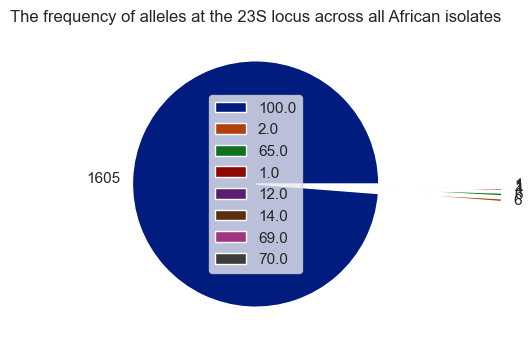

In [140]:
    # same process but for genotypic amr data from all of Africa...

    # separating out 23S RNA...
afr_23s: pd.DataFrame =  afr_ngstar_amr[["id", "isolate", "country", "year", "NG_23S"]]

    # removing rows containing NAs...
afr_23s = afr_23s.dropna(subset = "NG_23S")
    
    # cleaning function
Functions.clean(df = afr_23s, rename_cols = {"NG_23S": "ng_23s"}, to_str = "ng_23s")


    # ranking allele frequencies...
afr_23s_count = Functions.allele_rank(df = afr_23s, var = "ng_23s", max_value = 8)


Functions.pie(data = afr_23s_count, title = "The frequency of alleles at the 23S locus across all African isolates", exp = [0, 1, 1, 1, 1, 1, 1, 1])
plt.show()


This figure shows the same type of information as the previous two figures, but for all available African isolates. Because four alleles have a frequency of "1" and two alleles have a frequency of "6", I have not grouped low-frequency alleles together.
1) allele 100: Wild Type
2) allele 2: Mutation(s): C2611T; Azithromycin MIC:4 Erythromycin MIC: 32
3) allele **65**: Wild Type
4) allele 1: Mutation(s): A2059G; Azithromycin MIC:>=512; Erythromycin MIC:>=64	
5) allele 12: Wild Type
6) allele 14: Wild Type 
7) allele **69**: Wild Type
8) allele **70**: Mutation(s): C2611T

There are a few alleles found in this sample that aren't found in South African samples (65, 69, 70). 

The A2059G mutation is known to be associated with high-level resistance to erithromycin & azithromycin (macrolides). The C2611T mutations is known to be associated with low-level resistance to erithromycin & azithromycin.

Resistance to macrolides depends on the number of these resistance mutations present across an organism's **4 alleles**.


#### mtrR

In [141]:
my_ngstar_amr.head()
  
    # separating out mtrR...
my_mtrr: pd.DataFrame =  my_ngstar_amr[["id", "isolate", "region", "year", "'mtrR"]]

    # removing rows containing NAs in mtrR...
my_mtrr = my_mtrr.dropna(subset = ["'mtrR"])
    # simplifying column name(s)...

    # cleaning function
Functions.clean(df = my_mtrr, rename_cols = {"'mtrR": "mtrR"}, to_str = "mtrR")

    # ranking allele frequencies...
my_mtrr_count: pd.Series = Functions.allele_rank(df = my_mtrr, var = "mtrR")


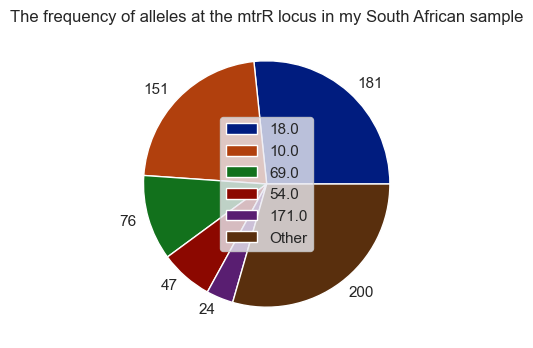

In [142]:
Functions.pie(data = my_mtrr_count, title = "The frequency of alleles at the mtrR locus in my South African sample")
plt.show()


Here, I have created a pie chart that shows the frequency of different allele ids for the 'mtrR locus. Explicitly stated are the top 5 most frequent alleles, with all others being grouped into the "other" group.
1) allele 18; Wild Type
2) allele 10; mutations: A39T
3) allele 69; Wild Type
4) allele 54; mutations: A39T
5) allele 171; Wild Type

The A39T mutation is not known to be associated with resistance to any antimicrobials.

In [143]:
    # same process but for genotypic amr data from all of South Africa...
  
    # separating out mtrR...
sa_mtrr: pd.DataFrame =  sa_ngstar_amr[["id", "isolate", "region", "year", "'mtrR"]]

    # removing rows containing NAs in mtrR...
sa_mtrr = sa_mtrr.dropna(subset = ["'mtrR"])
    
    # cleaning function
Functions.clean(df = sa_mtrr, rename_cols = {"'mtrR": "mtrR"}, to_str = "mtrR")
    

    # ranking allele frequencies...
sa_mtrr_count: pd.Series = Functions.allele_rank(df = sa_mtrr, var = "mtrR")


<Axes: title={'center': 'The frequency of alleles at the mtrR locus across all South African isolates'}>

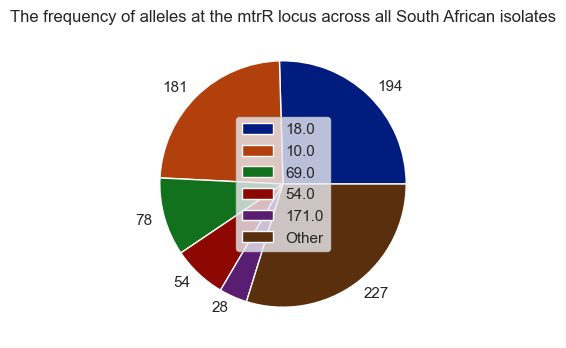

In [144]:
Functions.pie(data = sa_mtrr_count, title = "The frequency of alleles at the mtrR locus across all South African isolates")

This figure shows the same type of information as the previous, but across all available South African isolates:
1) allele 18; Wild Type
2) allele 10; mutations: A39T
3) allele 69; Wild Type
4) allele 54; mutations: A39T
5) allele 171; Wild Type

These allele IDs are the same as in my South African sample. The A39T mutation is not not to be associated with resistance to any antimicrobials.

In [145]:
    # same process but for genotypic amr data from all aross Africa...

   # separating out mtrR...
afr_mtrr: pd.DataFrame =  afr_ngstar_amr[["id", "isolate", "country", "year", "'mtrR"]]

    # removing rows containing NAs in mtrR...
afr_mtrr = afr_mtrr.dropna(subset = ["'mtrR"])

    # cleaning function
Functions.clean(df = afr_mtrr, rename_cols = {"'mtrR": "mtrR"}, to_str = "mtrR")

    # ranking allele frequencies...
afr_mtrr_count: pd.Series = Functions.allele_rank(df = afr_mtrr, var = "mtrR")


<Axes: title={'center': 'The frequency of alleles at the mtrR locus across all African isolates'}>

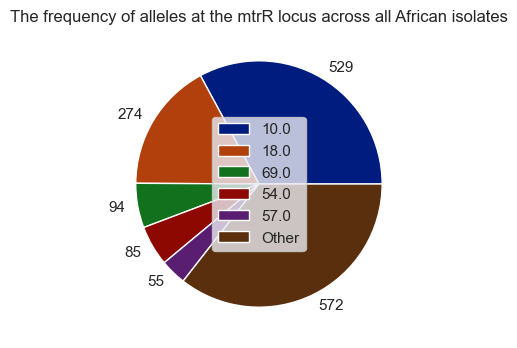

In [146]:
Functions.pie(data = afr_mtrr_count, title = "The frequency of alleles at the mtrR locus across all African isolates")

This figure shows the same type of information as the previous two, but for all available African isolates:
1) allele 10; mutations: A39T
2) allele 18; Wild Type
3) allele 69; Wild Type
4) allele 54; mutations: A39T
5) allele 57: Wild Type

Alleles ranked 1-4 are present in both of the previous two collections analysed (albeit in different order) but the rank 5 allele *57* is not. The A39T mutation is not not to be associated with resistance to any antimicrobials.

#### PorB

In [147]:
my_ngstar_amr.head()
  
    # separating out porB...
my_porb: pd.DataFrame =  my_ngstar_amr[["id", "isolate", "region", "year", "NG_porB"]]

    # removing rows containing NAs in mtrR...
my_porb = my_porb.dropna(subset = ["NG_porB"])

    # simplifying column name(s)...
Functions.clean(df = my_porb, rename_cols = {"NG_porB": "porB"}, to_str = "porB")

    # ranking allele frequencies...
my_porb_count: pd.Series = Functions.allele_rank(df = my_porb, var = "porB")


<Axes: title={'center': 'The frequency of alleles at the porB locus in my South African sample'}>

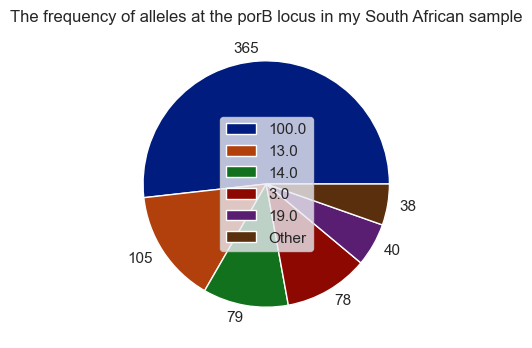

In [148]:
Functions.pie(data = my_porb_count, title = "The frequency of alleles at the porB locus in my South African sample")


This figure shows the frequency of alleles at the porB locus (under the NG-STAR scheme) in my South African sample. Explicitly shown are the 5 most frequent alleles, with the other low-frequency alleles being grouped together:
1) allele 100; Wild Type
2) allele 13; porB1a (P1A)
3) allele 14; porB1a (P1A)
4) allele 3; Mutations: A121S 
5) allele 19; porB1a (P1A)

None of these variants/mutations are associated with antimicrobial resistance.

In [149]:
sa_ngstar_amr.head()
  
    # separating out porB...
sa_porb: pd.DataFrame =  sa_ngstar_amr[["id", "isolate", "region", "year", "NG_porB"]]

    # removing rows containing NAs in mtrR...
sa_porb = sa_porb.dropna(subset = ["NG_porB"])
    
    # cleaning function
Functions.clean(df = sa_porb, rename_cols = {"NG_porB": "porB"}, to_str = "porB")

    # ranking allele frequencies...
sa_porb_count: pd.Series = Functions.allele_rank(df = sa_porb, var = "porB")


<Axes: title={'center': 'The frequency of alleles at the porB locus across all South African isolates'}>

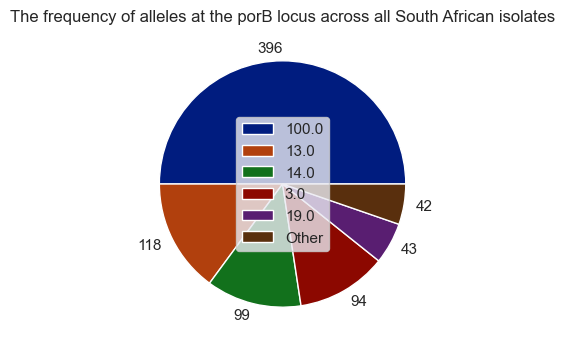

In [150]:
Functions.pie(data = sa_porb_count, title = "The frequency of alleles at the porB locus across all South African isolates")


This figure shows same type of information as the previous graph, but for all available South African isolates:
1) allele 100; Wild Type
2) allele 13; porB1a (P1A)
3) allele 14; porB1a (P1A)
4) allele 3; Mutations: A121S 
5) allele 19; porB1a (P1A)

This is the same ranking as in my South African sample. None of these variants/mutations are associated with antimicrobial resistance.

In [151]:
afr_ngstar_amr.head()
  
    # separating out porB...
afr_porb: pd.DataFrame =  afr_ngstar_amr[["id", "isolate", "country", "year", "NG_porB"]]

    # removing rows containing NAs in mtrR...
afr_porb = afr_porb.dropna(subset = ["NG_porB"])
    
    # cleaning function
Functions.clean(df = afr_porb, rename_cols = {"NG_porB": "porB"}, to_str = "porB")

    # ranking allele frequencies...
afr_porb_count: pd.Series = Functions.allele_rank(df = afr_porb, var = "porB")


<Axes: title={'center': 'The frequency of alleles at the porB locus across all African isolates'}>

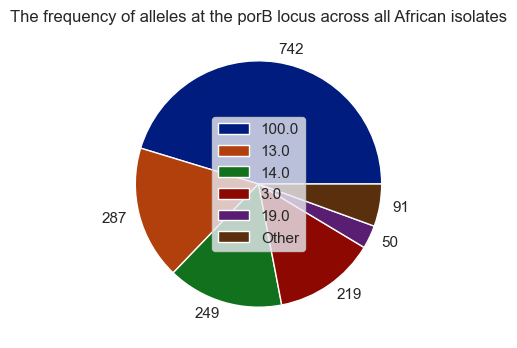

In [152]:
Functions.pie(data = afr_porb_count, title = "The frequency of alleles at the porB locus across all African isolates")


This figure shows the same type of information as the previous two, but for all available African isolates:
1) allele 100; Wild Type
2) allele 13; porB1a (P1A)
3) allele 14; porB1a (P1A)
4) allele 3; Mutations: A121S 
5) allele 19; porB1a (P1A)

This is the same ranking as in my South African sample. None of these variants/mutations are associated with antimicrobial resistance.

#### GyrA

In [153]:
my_ngstar_amr.head()
  
    # separating out gyrA...
my_gyra: pd.DataFrame =  my_ngstar_amr[["id", "isolate", "region", "year", "NG_gyrA"]]

    # removing rows containing NAs in mtrR...
my_gyra = my_gyra.dropna(subset = ["NG_gyrA"])

    # cleaning column name(s)...
Functions.clean(df = my_gyra, rename_cols = {"NG_gyrA": "gyrA"}, to_str = "gyrA")

    # ranking allele frequencies...
my_gyra_count: pd.Series = Functions.allele_rank(df = my_gyra, var = "gyrA")


<Axes: title={'center': 'The frequency of alleles at the gyrA locus my South African sample'}>

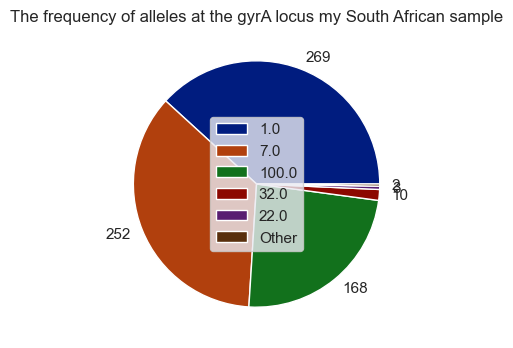

In [154]:
Functions.pie(data = my_gyra_count, title = "The frequency of alleles at the gyrA locus my South African sample")


This figure shows the frequency of alleles at the gyrA locus (under the NG-STAR typing scheme) for my South African sample. Explicitly shown are the 5 most frequency alleles, with other low-frequency alleles being grouped together:
1) allele 1; Mutation(s): S91F, D95G; Ciprofloxacin MIC: 2	
2) allele 7; Mutation(s) S91F, D95A; Ciprofloxacin MIC: 4	
3) allele 100; Wild Type
4) allele 32; Mutations(s): S91F, D95G
5) allele 22; Mutation(s): D95G	

The mutations S91F and D95G are known to be associated with resistance to Quinolones.

In [155]:
sa_ngstar_amr.head()
  
    # separating out gyrA...
sa_gyra: pd.DataFrame =  sa_ngstar_amr[["id", "isolate", "region", "year", "NG_gyrA"]]

    # removing rows containing NAs in mtrR...
sa_gyra = sa_gyra.dropna(subset = ["NG_gyrA"])

    # cleaning function
Functions.clean(df = sa_gyra, rename_cols = {"NG_gyrA": "gyrA"}, to_str = "gyrA")

    # ranking allele frequencies...
sa_gyra_count: pd.Series = Functions.allele_rank(df = sa_gyra, var = "gyrA")


<Axes: title={'center': 'The frequency of alleles at the gyrA locus across all South African isolates'}>

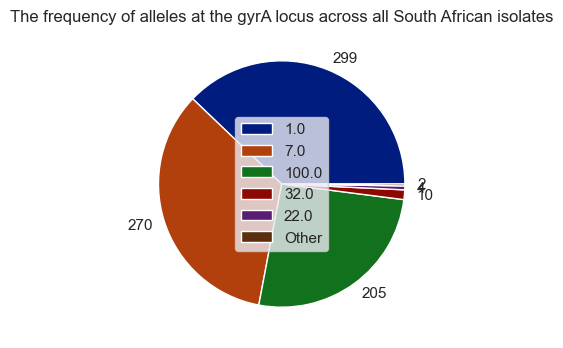

In [156]:
Functions.pie(data = sa_gyra_count, title = "The frequency of alleles at the gyrA locus across all South African isolates")


This figure shows the same type of information as the previous, but for all available South African isolates:
1) allele 1; Mutation(s): S91F, D95G; Ciprofloxacin MIC: 2	
2) allele 7; Mutation(s) S91F, D95A; Ciprofloxacin MIC: 4	
3) allele 100; Wild Type
4) allele 32; Mutations(s): S91F, D95G
5) allele 22; Mutation(s): D95G	

This order is the same as the ranking in my South African sample. The mutations S91F and D95G are known to be associated with resistance to Quinolones.

In [157]:
afr_ngstar_amr.head()
  
    # separating out gyrA...
afr_gyra: pd.DataFrame =  afr_ngstar_amr[["id", "isolate", "country", "year", "NG_gyrA"]]

    # removing rows containing NAs in mtrR...
afr_gyra = afr_gyra.dropna(subset = ["NG_gyrA"])

    # cleaning function
Functions.clean(df = afr_gyra, rename_cols = {"NG_gyrA": "gyrA"}, to_str = "gyrA")

    # ranking allele frequencies...
afr_gyra_count: pd.Series = Functions.allele_rank(df = afr_gyra, var = "gyrA")


<Axes: title={'center': 'The frequency of alleles at the gyrA locus across all African isolates'}>

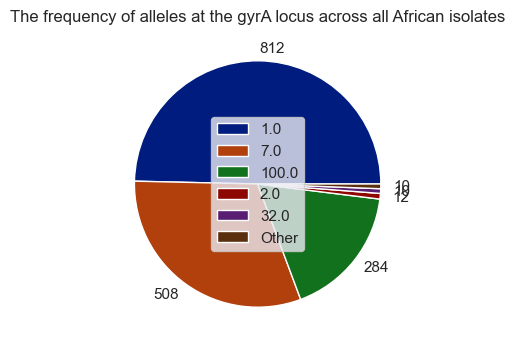

In [158]:
Functions.pie(data = afr_gyra_count, title = "The frequency of alleles at the gyrA locus across all African isolates")


This figure shows the same type of information as the previous, but for all available South African isolates:
1) allele 1; Mutation(s): S91F, D95G; Ciprofloxacin MIC: 2	
2) allele 7; Mutation(s) S91F, D95A; Ciprofloxacin MIC: 4	
3) allele 100; Wild Type
4) allele 2: Mutation(s): S91F, **D95N**; Ciprofloxacin: >32		
5) allele 32; Mutations(s): S91F, D95G

Alleles ranked 1-3 by frequency are also found in this order in my South African sample. The Rank 4 allele is a frequency allele in my South African sample, and allele 32 is instead ranked at 5 across all African isolates, instead of 4 as in my South African sample.

The mutations S91F, D95G and D95N are known to be associated with resistance to Quinolones. 

#### ponA

In [159]:

my_ngstar_amr.head()

    # separating out ponA...
my_pona: pd.DataFrame =  my_ngstar_amr[["id", "isolate", "region", "year", "NG_ponA"]]

    # removing rows containing NAs...
my_pona = my_pona.dropna(subset = ["NG_ponA"])
    
    # cleaning function
Functions.clean(df = my_pona, rename_cols = {"NG_ponA": "ponA"}, to_str = "ponA")


    # ranking allele frequencies...
my_pona_count: pd.Series = my_pona.groupby("ponA").ponA.count()


<Axes: title={'center': 'The frequency of alleles at the ponA locus in my South African sample'}>

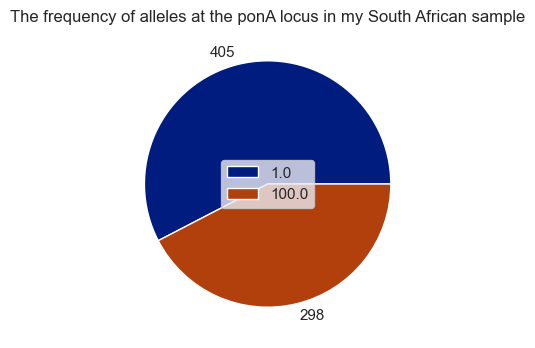

In [160]:
Functions.pie(data = my_pona_count, title = "The frequency of alleles at the ponA locus in my South African sample")


This figure shows the frequency of alleles at the ponA locus in my South African sample. There are only two alleles present:
1) allele 1: Mutation(s): L421P
2) allele 100: Wild Type

Alleles with the L421P mutation are described as the "ponA1 determinant", is associated with resistance to Penicillins.

In [161]:
    # same procedure but for all available South African isolates...
    
sa_ngstar_amr.head()

    # separating out ponA...
sa_pona: pd.DataFrame =  sa_ngstar_amr[["id", "isolate", "region", "year", "NG_ponA"]]

    # removing rows containing NAs...
sa_pona = sa_pona.dropna(subset = ["NG_ponA"])
    
    # cleaning function
Functions.clean(df = sa_pona, rename_cols = {"NG_ponA": "ponA"}, to_str = "ponA")


    # ranking allele frequencies...
sa_pona_count: pd.Series = sa_pona.groupby("ponA").ponA.count()


<Axes: title={'center': 'The frequency of alleles at the ponA locus across all South African isolates'}>

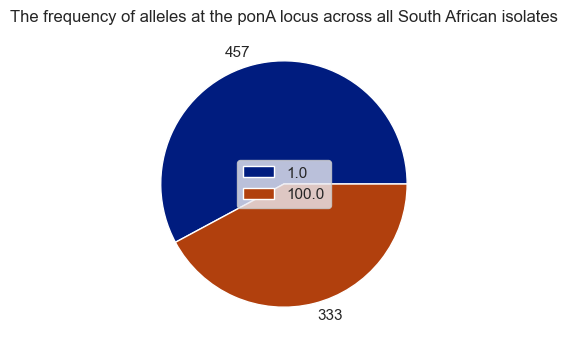

In [162]:
Functions.pie(data = sa_pona_count, title = "The frequency of alleles at the ponA locus across all South African isolates")


This figure shows the same type of information as the previous figure, but for all available South African isolates. There are only two alleles present:
1) allele 1: Mutation(s): L421P
2) allele 100: Wild Type

Alleles with the L421P mutation are described as the "ponA1 determinant", is associated with resistance to Penicillins.

In [163]:
    # same procedure but for all available African isolates...
    
afr_ngstar_amr.head()

    # separating out ponA...
afr_pona: pd.DataFrame =  afr_ngstar_amr[["id", "isolate", "country", "year", "NG_ponA"]]

    # removing rows containing NAs...
afr_pona = afr_pona.dropna(subset = ["NG_ponA"])
    
    # cleaning function
Functions.clean(df = afr_pona, rename_cols = {"NG_ponA": "ponA"}, to_str = "ponA")


    # ranking allele frequencies...
afr_pona_count: pd.Series = afr_pona.groupby("ponA").ponA.count()


<Axes: title={'center': 'The frequency of alleles at the ponA locus across all African isolates'}>

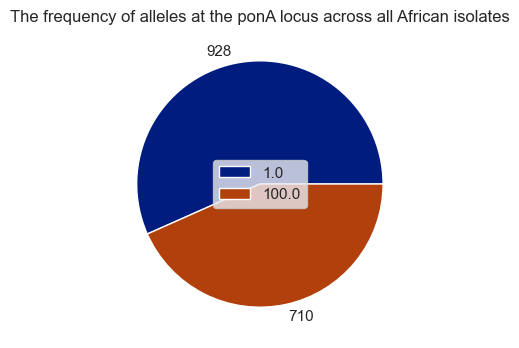

In [164]:
Functions.pie(data = afr_pona_count, title = "The frequency of alleles at the ponA locus across all African isolates")


This figure shows the same type of information as the previous two figures, but for all available African isolates. There are only two alleles present:
1) allele 1: Mutation(s): L421P
2) allele 100: Wild Type

Alleles with the L421P mutation are described as the "ponA1 determinant", is associated with resistance to Penicillins.

#### parC

In [165]:

my_ngstar_amr.head()

    # separating out parC...
my_parc: pd.DataFrame =  my_ngstar_amr[["id", "isolate", "region", "year", "NG_parC"]]

    # removing rows containing NAs...
my_parc = my_parc.dropna(subset = ["NG_parC"])
    
    # cleaning function
Functions.clean(df = my_parc, rename_cols = {"NG_parC": "parC"}, to_str = "parC")


    # ranking allele frequencies...
my_parc_count: pd.Series = Functions.allele_rank(df = my_parc, var = "parC")


<Axes: title={'center': 'The frequency of alleles at the parC locus in my South African sample'}>

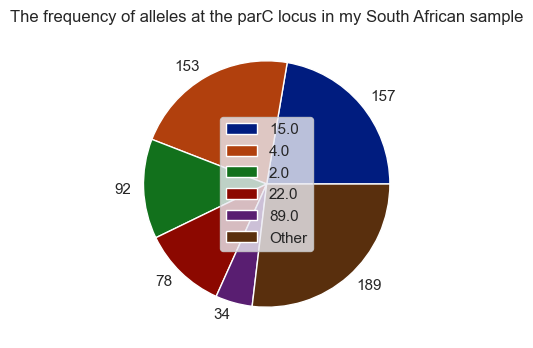

In [166]:
Functions.pie(data = my_parc_count, title = "The frequency of alleles at the parC locus in my South African sample")


This figure shows the frequency of alleles at the parC locus in my South African sample. Explicitly shown are the top 5 most frequent alleles, with other low-frequency alleles being grouped together:
1) allele 15: Mutation(s): S87N
2) allele 4: Mutations(s): D86N
3) allele 2: Wild Type
4) allele 22: Wild Type
5) allele 89: Wild Type

The S87N mutation is not known to be associated with antimicrobial resistance, however the D86N mutation is known to be associated with high-level ciprofloxacin resistance.

In [167]:
    # same procedures, but for all available South African isolates

sa_ngstar_amr.head()

    # separating out parC...
sa_parc: pd.DataFrame =  sa_ngstar_amr[["id", "isolate", "region", "year", "NG_parC"]]

    # removing rows containing NAs...
sa_parc = sa_parc.dropna(subset = ["NG_parC"])
    
    # cleaning function
Functions.clean(df = sa_parc, rename_cols = {"NG_parC": "parC"}, to_str = "parC")


    # ranking allele frequencies...
sa_parc_count: pd.Series = Functions.allele_rank(df = sa_parc, var = "parC")


<Axes: title={'center': 'The frequency of alleles at the parC locus across all South African isolates'}>

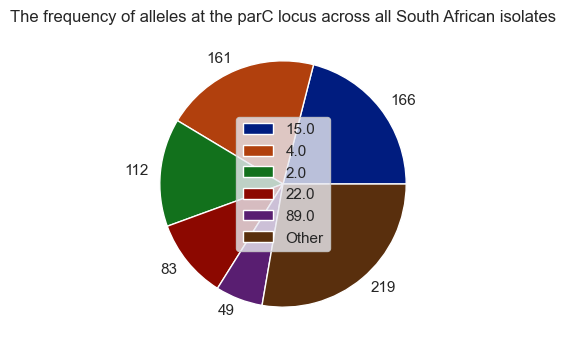

In [168]:
Functions.pie(data = sa_parc_count, title = "The frequency of alleles at the parC locus across all South African isolates")


This figure shows the same type of information as the previous figure, but for all available South African isolates:
1) allele 15: Mutation(s): S87N
2) allele 4: Mutations(s): D86N
3) allele 2: Wild Type
4) allele 22: Wild Type
5) allele 89: Wild Type

This is the same ranking as in my South African sample. The S87N mutation is not known to be associated with antimicrobial resistance, however the D86N mutation is known to be associated with high-level ciprofloxacin resistance.

In [169]:
    # same procedures, but for all available African isolates

afr_ngstar_amr.head()

    # separating out parC...
afr_parc: pd.DataFrame =  afr_ngstar_amr[["id", "isolate", "country", "year", "NG_parC"]]

    # removing rows containing NAs...
afr_parc = afr_parc.dropna(subset = ["NG_parC"])
    
    # cleaning function
Functions.clean(df = afr_parc, rename_cols = {"NG_parC": "parC"}, to_str = "parC")


    # ranking allele frequencies...
afr_parc_count: pd.Series = Functions.allele_rank(df = afr_parc, var = "parC")


<Axes: title={'center': 'The frequency of alleles at the parC locus across all African isolates'}>

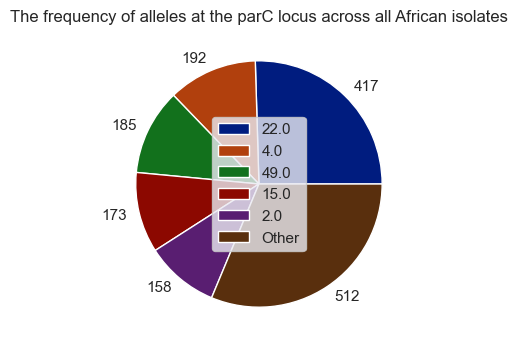

In [170]:
Functions.pie(data = afr_parc_count, title = "The frequency of alleles at the parC locus across all African isolates")


This figure shows the same type of information as the previous two figures, but for all available African isolates:
1) allele 22: Wild Type
2) allele 4: Mutations(s): D86N
3) allele **49**: Wild Type 
4) allele 15: Mutation(s): S87N
5) allele 2: Wild Type

Four of the 5 most frequent alleles in the my South African sample & all South African collection are present in this collection of isolates (22, 4, 15 & 2). However, allele 89 is no longer in the top 5 most frequent alleles. There is now allele 49.

The S87N mutation is not known to be associated with antimicrobial resistance, however the D86N mutation is known to be associated with high-level ciprofloxacin resistance.

### Genotypic & Phenotypic AMR links

#### Investigating Azithromycin Resistance


In [171]:
    # extracting the resistant strains' NG-STAR data
my_azi_res_geno: pd.DataFrame = my_ngstar_amr.loc[my_ngstar_amr["id"].isin(list(my_azi_res["id"]))].copy()

    # dropping unneeded columns
my_azi_res_geno.drop(my_azi_res_geno.columns[[11,12]], axis = 1, inplace = True)
#my_azi_res_geno


KeyError: 'id'

23S RNA:
- 140585: allele 1; A2059G; Azithromycin MIC:>=512; Erythromycin MIC:>=64
- 140587: allele 2; C2611T; Azithromycin MIC:4 Erythromycin MIC: 32
- 140591: allele 1 -
- 140600: allele 2 -
- 140618: allele 2 -


mtrR:

Mutations result in overexpression of MtrCDE efflux pump, thus increased efflux from it. This would mean increased efflux of macrolides.

- 140585: allele 25; G45D;
- 140587: allele 568; A39T
- 140591: allele 25 -
- 140600: allele 568 -
- 140618: allele 568 -

mtrC:

There are *rare* mutations in the mtrC gene that can lead to high-level resistance by increase in macrolide efflux.

- 140585: allele 12; 
- 140587: allele 12
- 140591: allele 12
- 140600: allele 12
- 140618: allele 12

ermB:

erm genes are RNA methylases that can block macrolide binding to 23S rRNA by methylating a residue. This can lead to high-level resistance to erithromycin and low-level resistance to aazithromycin.

- 140585: allele 7; 
- 140587: allele 5;
- 140591: allele 7 -
- 140600: allele 5 -
- 140618: allele 5 -

MacAB efflux pump (MacA):
- The MacAB efflux pump can export macrolides.
- Something about macA and macB genes? they are organised as an operon and mutations in it affects MacAB expression? A G > T


- 140585: allele 469;
- 140587: allele 477;
- 140591: allele 469 -
- 140600: allele 477 -
- 140618: allele 477 -

(MacB):
- 140585: allele 345; 
- 140587: allele 583; 
- 140591: allele 345 -
- 140600: allele 583 -
- 140618: allele 583 -


mef-encoded efflux pump:

The mef-encoded efflux pump protein recognises macrolides

- 140585: 
- 140587:
- 140591:
- 140600:
- 140618: 


### Investigating lineage 0_2_1

In [82]:
    # identifying isolates in my SA data that are part of lineage 0_2_1
print(f"In my SA collection, isolate IDs {list((my_lin.loc[my_lin["LIN3"] == "0_2_1"]["id"]))} are part of lineage 0_2_1")


    # extracting  their NG-STAR data
my_0_2_1_ngstar: pd.DataFrame = my_ngstar_amr.loc[my_ngstar_amr["id"].isin([140601, 140604, 140611, 140612, 155468, 155636])].copy()


    # removing unneeded columns
my_0_2_1_ngstar.drop(columns = ["ST(NG STAR)", "CC(NG STAR)"], inplace = True)


In my SA collection, isolate IDs [140601, 140604, 140611, 140612, 155468, 155636] are part of lineage 0_2_1


'mtrR:
- All 6 isolates have 'mtrR allele **9**, which has the mutation **A39T**
- This mutation...


In [83]:
    # identifying other African isolates with 'mtrR 9
mtrr_9: pd.DataFrame = afr_mtrr[afr_mtrr["mtrR"] == "9.0"]

print(f"Other African isolate IDs with 'mtrR allele 9: {list(mtrr_9[~mtrr_9["id"].isin([140601, 140604, 140611, 140612, 155468, 155636])]["id"])}")

#my_lin[my_lin["id"].isin([131315, 154295, 155714])]
print(f"Isolate IDs 131315 and 155714 are from my South African sample")

#sa_lin[sa_lin["id"].isin([131315, 154295, 155714])]
print(f"Isolate ID 154295 is from another South African collection")


Other African isolate IDs with 'mtrR allele 9: [131315, 154295, 155714]
Isolate IDs 131315 and 155714 are from my South African sample
Isolate ID 154295 is from another South African collection


- Particularly if A39T is associated with AMR, this could be supporting evidence for the importance of personalised treatment.
- Of the hundreds of SA isolates available, **only 9** have allele 9, suggesting country may not be suitable information to base gonorrhoea treatment off of. 

In [84]:
print(sa_mtrr[sa_mtrr["mtrR"] == "9.0"].groupby("region")["isolate"].count())

print(f"Total number of isolates from Gauteng Province: {len(sa_mtrr[sa_mtrr["region"].isin(["Gauteng", "Gauteng Province"])])}")

region
Gauteng             3
Gauteng Province    4
Western Cape        1
Name: isolate, dtype: int64
Total number of isolates from Gauteng Province: 530


Of 530 isolates collected from the Gauteng Province in South Africa, only 7 have allele 9 which **might be** an AMR determinant - CHECK. Could be part of evidence, showing that region isn't an indicator of AMR profile (AMR determinants may be at low frequencies) so personalised treatment/identification is important.

PenA:
- All 6 isolates have the PenA allele **166** - F504L; Type II Non-mosaic NG STAR penA allele: 2.001 penicillin MIC: 0.5
- What does 2.001 mean?
- Allele 166 is the 5th most frequent allele in (i) my South African collection (ii) all South African collections and (iii) all African collections.


23S RNA:
- 5/6 isolates have the 23S RNA allele **100**, which is Wild Type
- This is the most frequent allele in (i) my SA collection, (ii) all SA collections and (iii) all African collections.
- Isolate *140611* has missing data at this locus


gyrA:
- All isolates have the gyrA allele **100**, which is Wild Type
- This allele is the 3rd most frequent allele in (i) my SA collection, (ii) all SA collections and (iii) all African collections

ParC:
- All isolates have the parC allele **100**, which is Wild Type


In [85]:
    # identifying all strains in Africa with parC 100
parc_100: pd.DataFrame = afr_parc[afr_parc["parC"] == "100.0"]
print(f"Across all African collections, {len(parc_100.index)} isolates have parC allele 100")

    # identifying how many are from South Africa
print(f"Across all South African collections, {len(parc_100[parc_100["country"] == "South Africa"].index)} isolates have parC allele 100")

    # identifying how many are from my South African collection
print(f"In my South African collection, {len(my_parc[my_parc["parC"] == "100.0"].index)} isolates have parC allele 100")



Across all African collections, 45 isolates have parC allele 100
Across all South African collections, 35 isolates have parC allele 100
In my South African collection, 27 isolates have parC allele 100


- Is this an important point? The fact that the new SA collection contains a large proportion of a low-frequency (albeit WT) allele.

PonA:
- All isolates have the ponA allele **100**, which is Wild Type
- This allele is the 2nd most frequent in (i) my SA collection, (ii) all SA collections and (iii) all African collections


porB:
- Isolates *140601*, *140611* and *155468* have porB allele **13**, which encodes porB1a
- This allele is the 2nd most frequent allele in (i) my SA collection, (ii) all SA collections and (iii) all African collections.
- Isolates *140604*, *140612*, *155636* have porB allele **1**, which is Wild Type


In [86]:
    # identifying which African isolates have porB 1
porb_1: pd.DataFrame = afr_porb[afr_porb["porB"] == "1.0"]

    # identifying other African isolates with porB 1
print(f"Other African isolate IDs with porB allele 1: {list(porb_1[~porb_1["id"].isin([140604, 140612, 155636])]["id"])}")

#my_lin[my_lin["id"].isin([106153, 125950, 155714])]
print(f"Isolate ID 155714 is from my South African collection")

#sa_lin[sa_lin["id"].isin([106153, 125950, 155714])]
#afr_lin[afr_lin["id"].isin([106153, 125950, 155714])]
print(f"Isolate IDs 106153 and 125950 are from other African collections")


Other African isolate IDs with porB allele 1: [106153, 125950, 155714]
Isolate ID 155714 is from my South African collection
Isolate IDs 106153 and 125950 are from other African collections


### Investigating lineage 0_0_26

In [87]:
    # identifying isolates in my SA data that are part of lineage 0_0_26
print(f"In my SA collection, isolate IDs {list((my_lin.loc[my_lin["LIN3"] == "0_0_26"]["id"]))} are part of lineage 0_0_26")


    # extracting their NG-STAR data
my_0_0_26_ngstar: pd.DataFrame = my_ngstar_amr[my_ngstar_amr["id"] == 155659].copy()


    # removing unneeded columns
my_0_0_26_ngstar.drop(columns = ["ST(NG STAR)", "CC(NG STAR)"], inplace = True)
my_0_0_26_ngstar


In my SA collection, isolate IDs [155659] are part of lineage 0_0_26


,id,isolate,region,year,'mtrR,NEIS1753(PenA),NG_23S,NG_gyrA,NG_parC,NG_ponA,NG_porB
586,155659,21MUS-AH028,Gauteng,2021,40.0,23.0,100.0,7.0,4.0,100.0,100.0


'mtrR:
- Allele 40: A39T - associated??


In [88]:
    # identifying all african isolates with 'mtrR 4
afr_40: pd.DataFrame = afr_mtrr[afr_mtrr["mtrR"] == "40.0"]

    # filtering out isolate ID 155659 
print(f"There are {len(afr_40[afr_40["id"] != 155659])} other African isolates with 'mtrR allele 4")
print(f"These isolates are from countries: {list(afr_40["country"].unique())}")

    # identifying which countries they are from
afr_40_sub: pd.DataFrame = afr_40[afr_40["id"] != 155659]

print(f"Of these South African isolates {len(afr_40_sub[afr_40_sub["id"].isin(my_lin["id"])])} are from my South African collection")
print(f"The isolate ID(s) that is from another South African collection is: {list(afr_40[~afr_40["id"].isin(my_lin["id"])]["id"])}")


There are 21 other African isolates with 'mtrR allele 4
These isolates are from countries: ['South Africa']
Of these South African isolates 19 are from my South African collection
The isolate ID(s) that is from another South African collection is: [109109, 109112]


- Another example of a infrequent and **potentially resistance** allele in Africa.

PenA:
- Allele 23
- F504→L Type II non-mosaic NG STAR penA allele: 2.002 Penicillin MIC: 64
- What is 2.002?
- This allele is the 2nd most frequent allele in (i) my South African collection and (ii) all South African collections, and the 3rd most frequent allele in all African collections

23S RNA:
- Allele 100
- Wild Type
- This allele is the most frequent allele in (i) my SA collection, (ii) all SA collections and (iii) all African collections

GyrA:
- Allele 7
- mutations S91F, D95A Ciprofloxacin MIC: 4	
- This allele is the 2nd most frequent allele in (i) my SA collection, (ii) all SA collections and (iii) all African collections

ParC:
- Allele 4
- D86N
- This allele is the 2nd most frequent allele in (i) my SA collection, (ii) all SA collections and (iii) all African collections

PonA:
- Allele 100
- Wild Type
- This allele is the 2nd most frequent in (i) my SA collection, (ii) all SA collections and (iii) all African collections

PorB:
- Allele 100
- Wild Type
- This allele is the most frequent allele in (i) my SA collection, (ii) all SA collections and (iii) all African collections
